# Bitcoin Price Prediction

<img src = "01.png" width = 6000 height = 600 />

## Problem Statement :

* Predicting the Bitcoin Price.
* Bitcoin is the most complex cryptocurrency which value change in every second.
* Investing money for Bitcoin is more risk and less profit.

## Introduction :

* Bitcoin (₿) is a decentralized digital currency, without a central bank or single administrator, that can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries.
* Transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain. 
* The cryptocurrency was invented in 2008 by an unknown person or group of people using the name Satoshi Nakamoto.
* The currency began use in 2009, when its implementation was released as open-source software.

## Dataset Source : 

  https://www.kaggle.com/team-ai/bitcoin-price-prediction/version/1

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import itertools    

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
Data = pd.read_csv("bitcoin_price_Training - Training.csv", index_col = "Date")
Data.head()

Open     High      Low    Close         Volume  \
Date                                                              
Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   

                  Market Cap  
Date                          
Jul 31, 2017  45,535,800,000  
Jul 30, 2017  44,890,700,000  
Jul 29, 2017  46,246,700,000  
Jul 28, 2017  44,144,400,000  
Jul 27, 2017  41,816,500,000

In [3]:
Data.shape

(1556, 6)

## Summary of Data

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, Jul 31, 2017 to Apr 28, 2013
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-null   float64
 3   Close       1556 non-null   float64
 4   Volume      1556 non-null   object 
 5   Market Cap  1556 non-null   object 
dtypes: float64(4), object(2)
memory usage: 85.1+ KB


In [5]:
Data.describe()

Open         High          Low        Close
count  1556.000000  1556.000000  1556.000000  1556.000000
mean    582.625328   597.992847   567.851446   584.239396
std     523.137312   542.992855   505.877401   525.904442
min      68.500000    74.560000    65.530000    68.430000
25%     254.287500   260.327500   248.835000   254.320000
50%     438.600000   447.560000   430.570000   438.855000
75%     662.437500   674.525000   646.735000   663.402500
max    2953.220000  2999.910000  2840.530000  2958.110000

## Missing Values

In [6]:
Data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

* Dataset have no missing values.

## Data Visualization

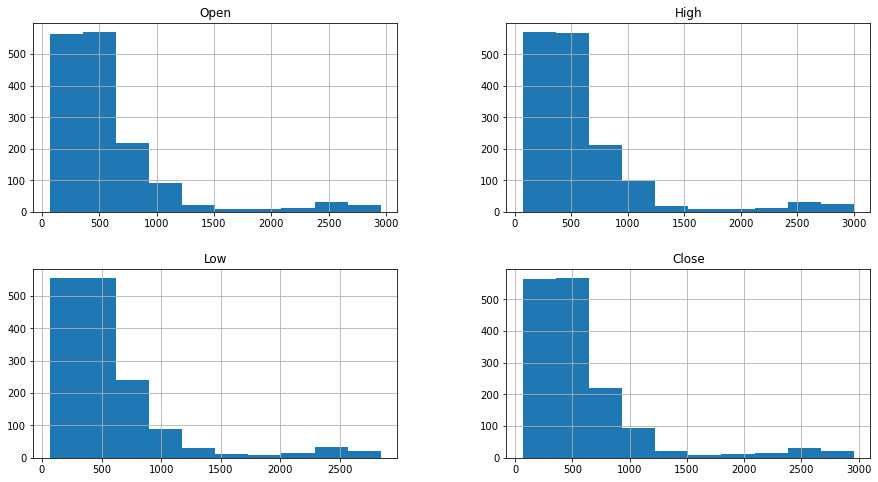

In [7]:
Data.hist(figsize = (15,8))
plt.show()

### Sorting the Date

In [8]:
Data.index = pd.to_datetime(Data.index)
Data = Data.sort_index()
Data.head()

Open    High     Low   Close Volume     Market Cap
Date                                                            
2013-04-28  135.30  135.98  132.10  134.21      -  1,500,520,000
2013-04-29  134.44  147.49  134.00  144.54      -  1,491,160,000
2013-04-30  144.00  146.93  134.05  139.00      -  1,597,780,000
2013-05-01  139.00  139.89  107.72  116.99      -  1,542,820,000
2013-05-02  116.38  125.60   92.28  105.21      -  1,292,190,000

Text(0, 0.5, 'Daily Bitcoin Price')

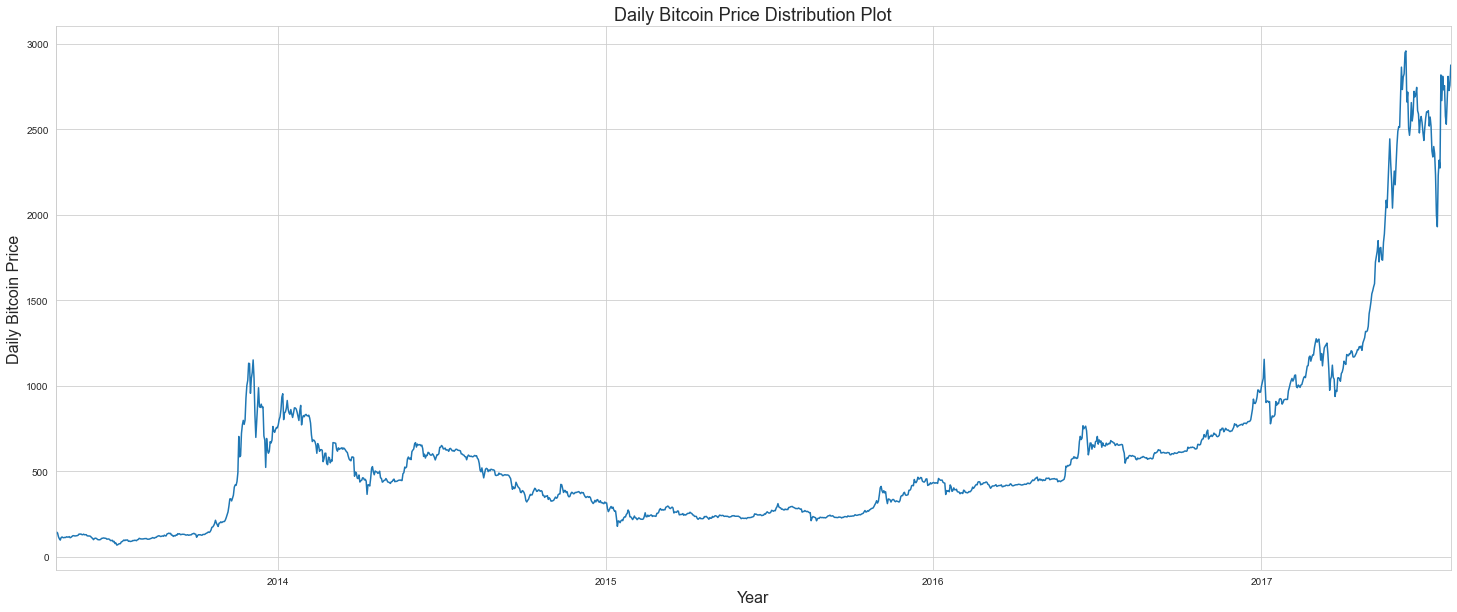

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize = (25,10))
Data['Close'].plot()
plt.title('Daily Bitcoin Price Distribution Plot', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Daily Bitcoin Price', fontsize = 16)

* There is a trend starting slowly from late 2015, increasing slowly till mid 2017 and very rapidly thereafter.
* Seasonality seems to be absent
* Non-stationary time series.

Text(0, 0.5, 'Weekly Bitcoin Price')

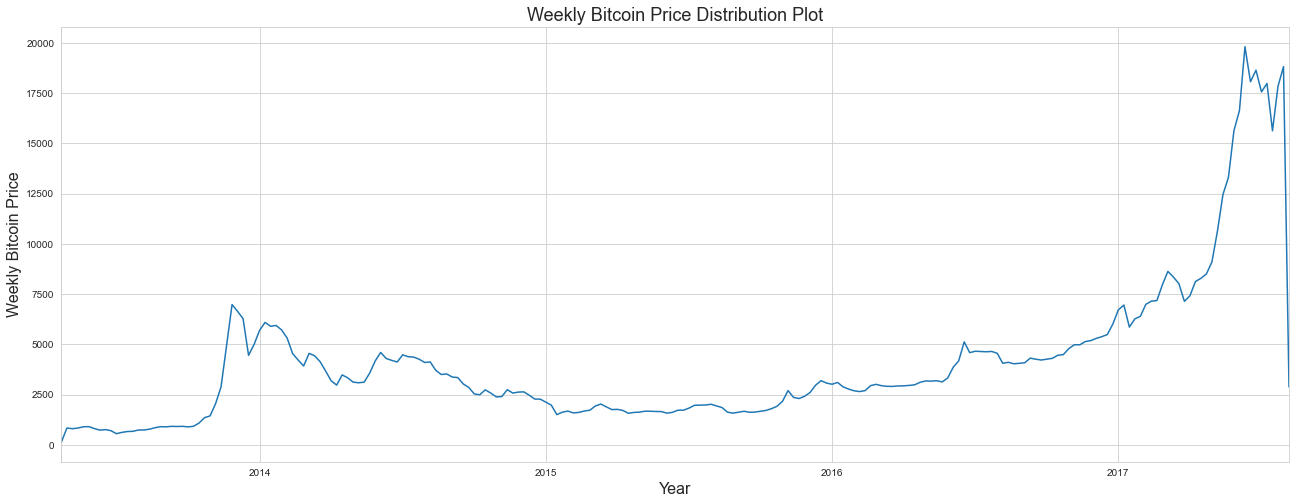

In [10]:
weekly = Data['Close'].resample('W').sum()
sns.set_style("whitegrid")
plt.figure(figsize = (22,8))
weekly.plot()
plt.title('Weekly Bitcoin Price Distribution Plot', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Weekly Bitcoin Price', fontsize = 16)

Text(0, 0.5, 'Monthly Bitcoin Price')

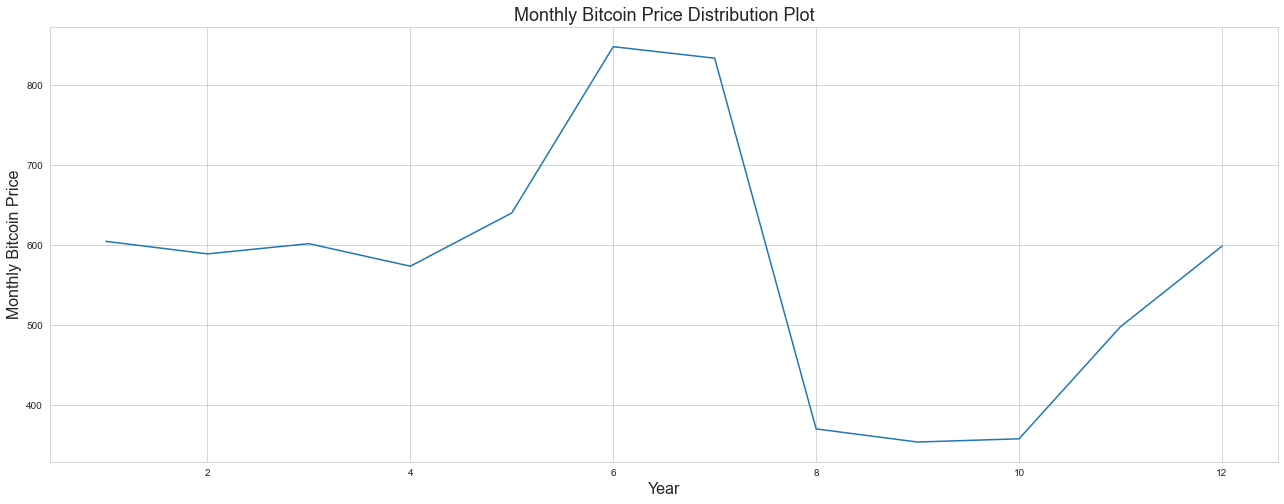

In [11]:
Month = Data['Close'].groupby(Data['Close'].index.month).mean()
sns.set_style("whitegrid")
plt.figure(figsize = (22,8))
Month.plot()
plt.title('Monthly Bitcoin Price Distribution Plot', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Monthly Bitcoin Price', fontsize = 16)

Text(0, 0.5, 'Quarterly Bitcoin Price')

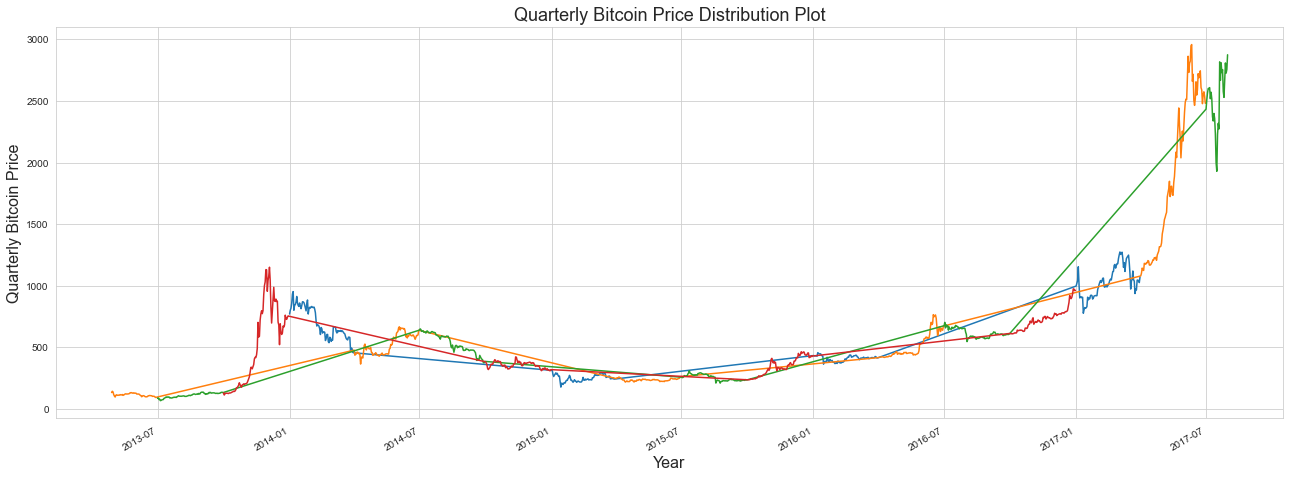

In [12]:
Quarter = Data['Close'].groupby(Data['Close'].index.quarter)
plt.figure(figsize = (22,8))
Quarter.plot()
plt.title('Quarterly Bitcoin Price Distribution Plot', fontsize = 18)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Quarterly Bitcoin Price', fontsize = 16)

In [13]:
Weekend = np.where(Data['Close'].index.weekday < 5, 'Weekday', 'Weekend')
Time = Data['Close'].groupby([Weekend, Data['Close'].index.year]).mean()

<AxesSubplot:title={'center':'Weekends'}, xlabel='Date'>

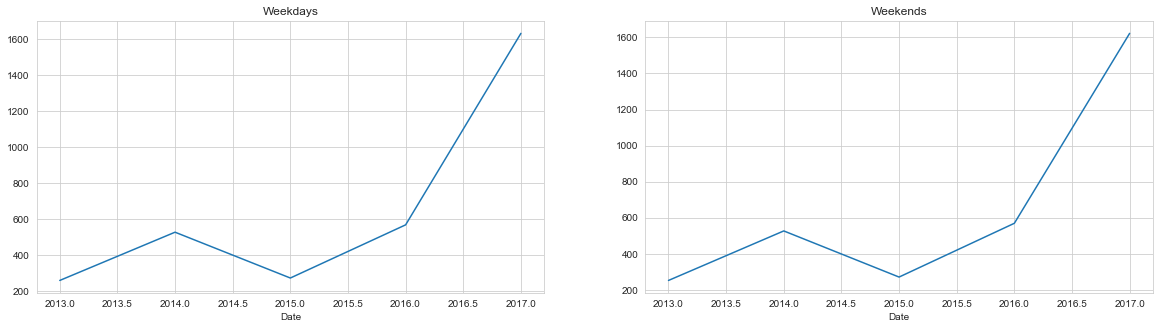

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
Time.loc['Weekday'].plot(ax = ax[0], title = 'Weekdays')
Time.loc['Weekend'].plot(ax = ax[1], title = 'Weekends')

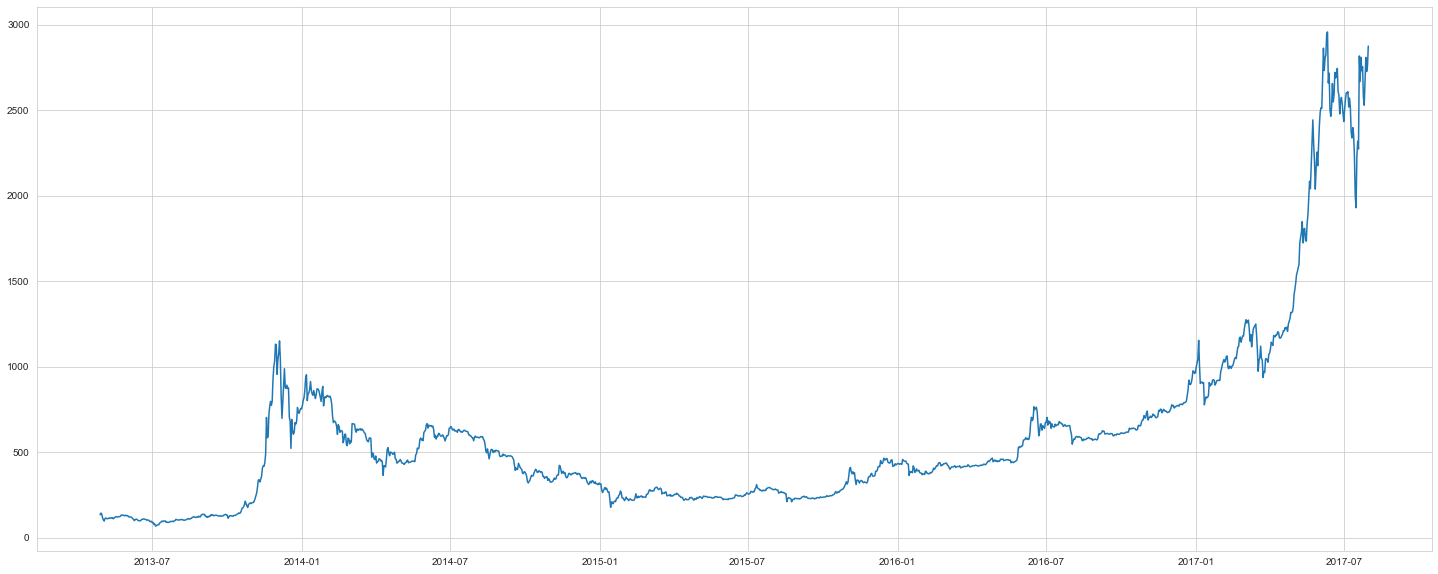

In [15]:
ts = Data['Close']
plt.figure(figsize = (25,10))
plt.plot(ts)

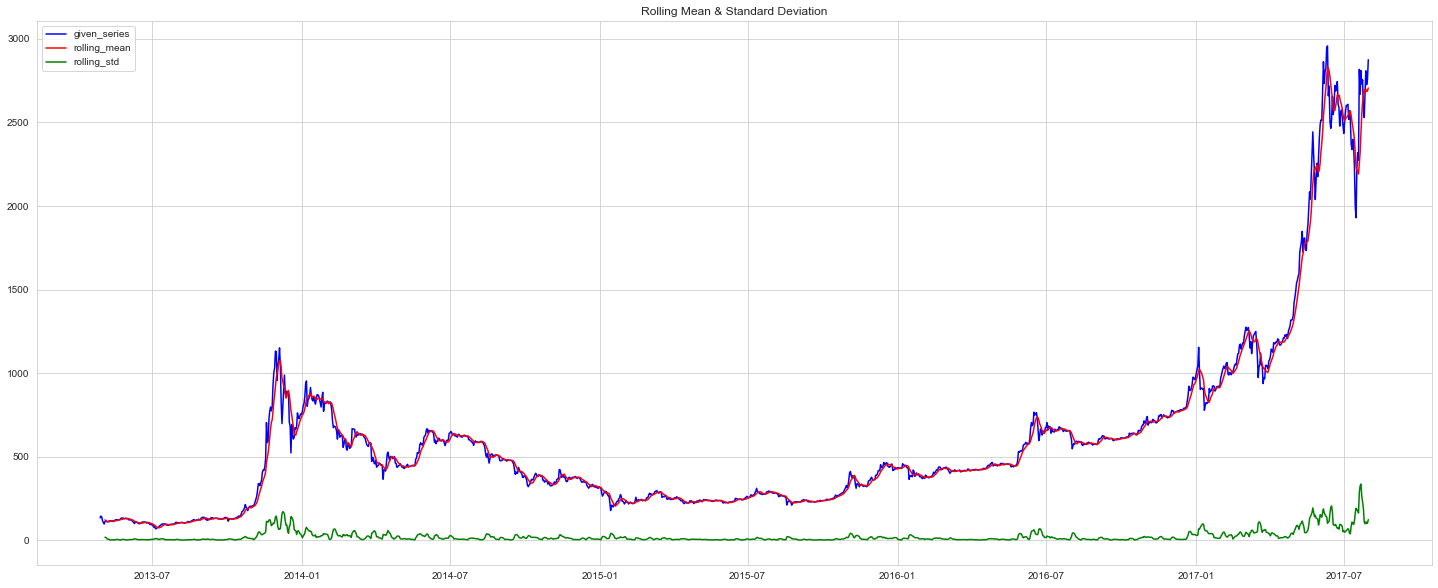

Results of Dickey-Fuller Test:
Test Statistic                    2.535589
p-value                           0.999060
#Lags Used                       24.000000
Number of Observations Used    1531.000000
Critical Value (1%)              -3.434628
Critical Value (5%)              -2.863430
Critical Value (10%)             -2.567776
dtype: float64


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7, center = False).mean()
    r_std = input_data.rolling(window = 7, center = False).std()
    
# plotting the data
    plt.figure(figsize = (25,10))
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
#Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(ts)

* The test statistic is very large compared to the crtical value. 
* The above series show that rolling mean value varies with time and is not stationary. 
* The series needs to be Stationarized. 
* we need to eliminate the trend and seasonality from the series to make it stationary

## Transforming the Data - (to eliminate trend)

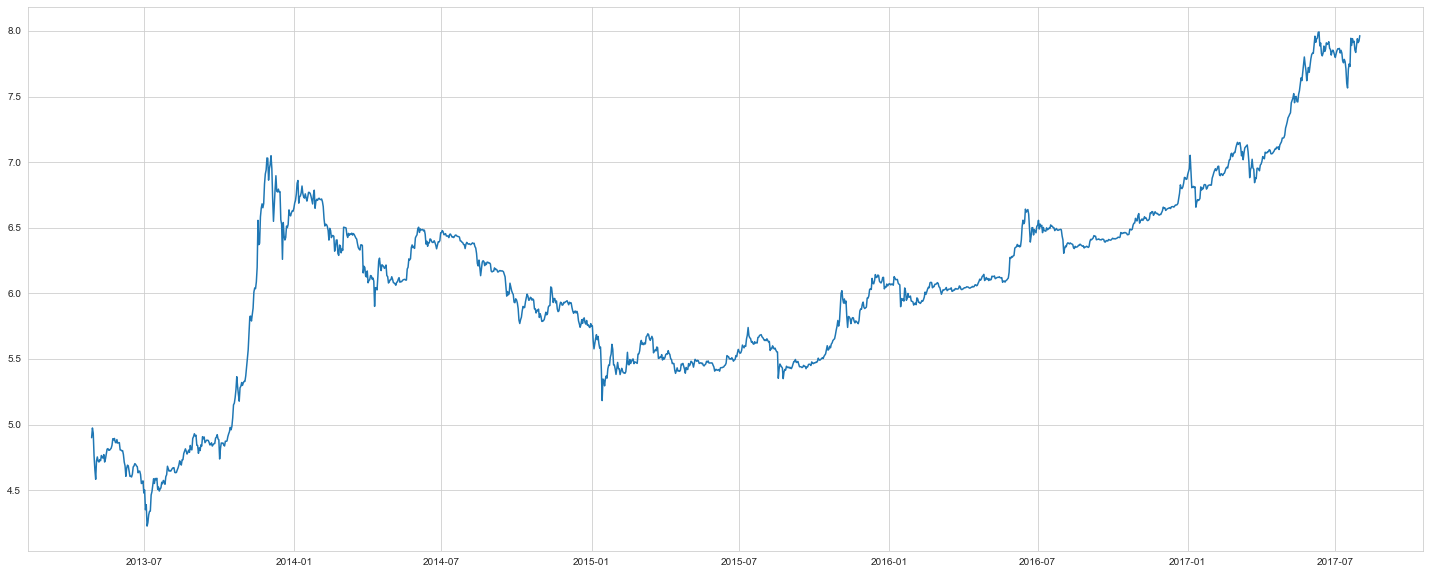

In [17]:
ts_logtransformed = np.log(ts)
plt.figure(figsize = (25,10))
plt.plot(ts_logtransformed)

In [18]:
ts_logtransformed.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
2013-05-03    4.582413
2013-05-04    4.722953
2013-05-05    4.752814
2013-05-06    4.721174
2013-05-07    4.714025
Name: Close, dtype: float64

## Smoothing by Rolling Average

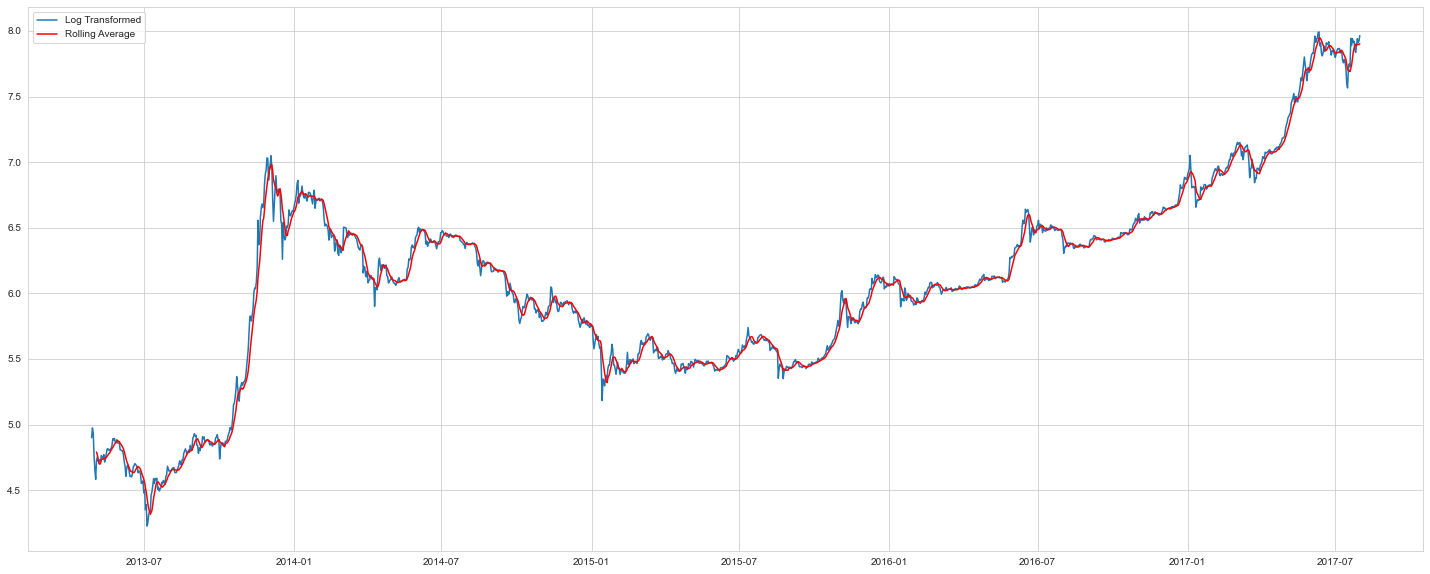

In [19]:
Rolling_average = ts_logtransformed.rolling(window = 7, center = False).mean()
plt.figure(figsize = (25,10))
plt.plot(ts_logtransformed, label = 'Log Transformed')
plt.plot(Rolling_average, color = 'red', label = 'Rolling Average')
plt.legend(loc = 'best')

* The Red line shows the Rolling Mean. 
* Note that since we are taking average of last 7 values, rolling mean is not defined for first 7 values. 

In [20]:
Rolling_average.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04    4.790121
2013-05-05    4.769180
2013-05-06    4.733125
2013-05-07    4.701632
Name: Close, dtype: float64

In [21]:
log_Rolling_difference = ts_logtransformed - Rolling_average
log_Rolling_difference.head(10)
log_Rolling_difference.tail(10)

Date
2017-07-22    0.151593
2017-07-23    0.073239
2017-07-24    0.051861
2017-07-25   -0.030130
2017-07-26   -0.063797
2017-07-27   -0.001463
2017-07-28    0.041254
2017-07-29    0.015741
2017-07-30    0.025554
2017-07-31    0.061402
Name: Close, dtype: float64

* Replacing Missing values with 0 in the above Dataframe to avoid any Errors in the future.

Text(0.5, 0, 'Year')

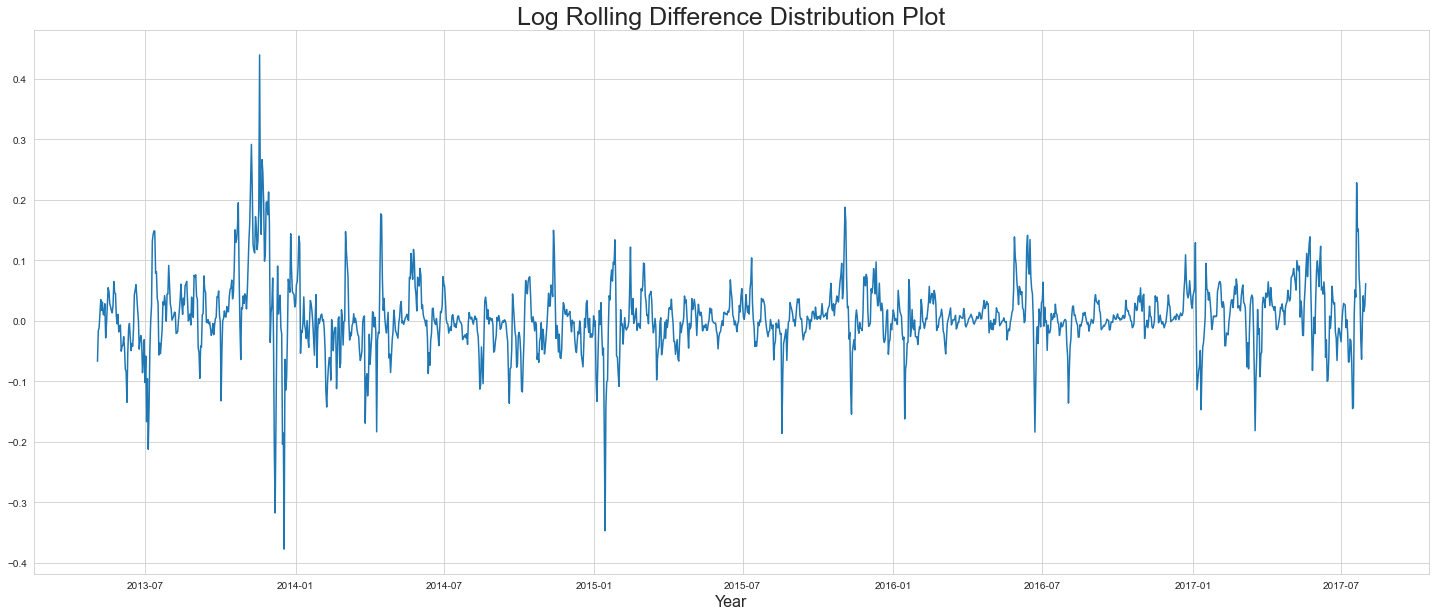

In [22]:
log_Rolling_difference.dropna(inplace = True)
plt.figure(figsize = (25,10))
plt.plot(log_Rolling_difference)
plt.title('Log Rolling Difference Distribution Plot', fontsize = 25)
plt.xlabel('Year', fontsize = 16)

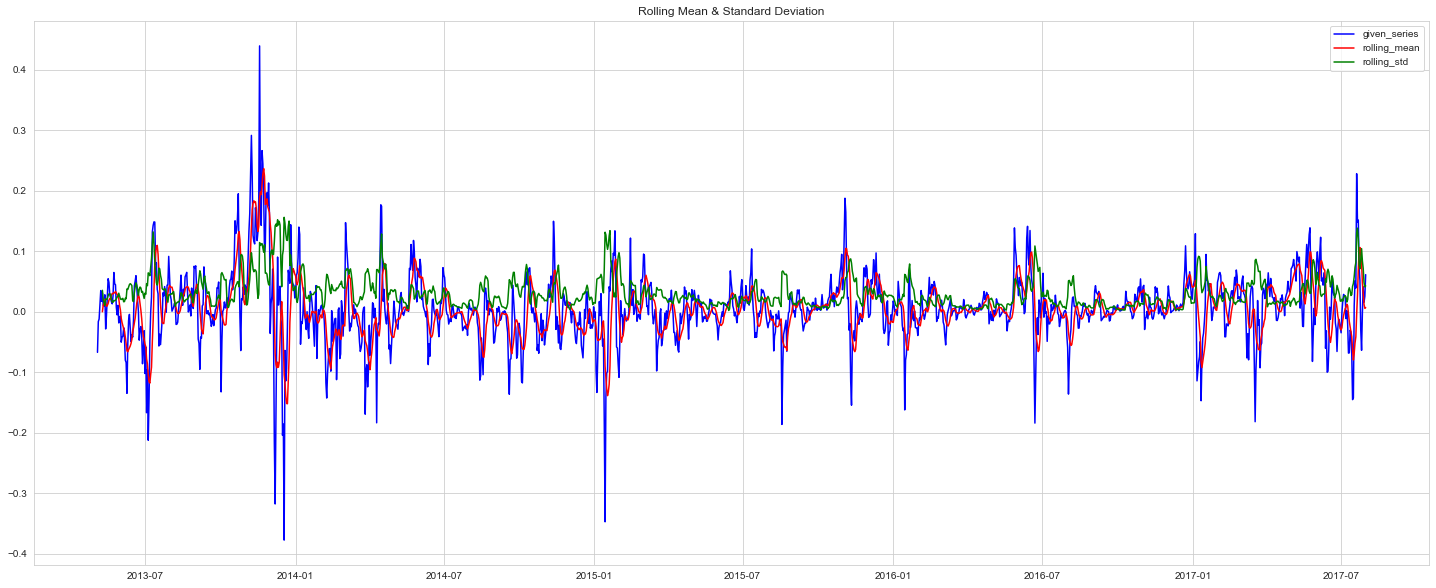

Results of Dickey-Fuller Test:
Test Statistic                -7.191326e+00
p-value                        2.499260e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.527000e+03
Critical Value (1%)           -3.434640e+00
Critical Value (5%)           -2.863435e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [23]:
test_for_stationary(log_Rolling_difference)

* Use Exponential Weighted Moving Average instead of Moving Average to Improve the Solution

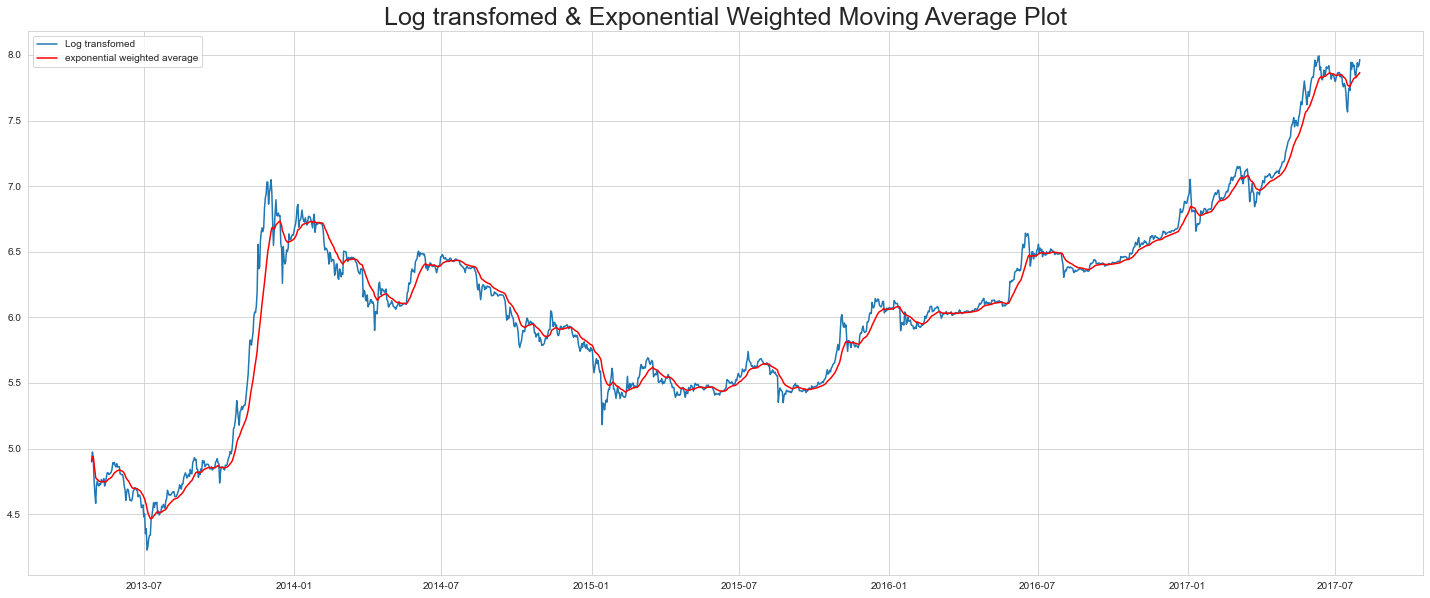

In [24]:
Expwighted_avg = ts_logtransformed.ewm(halflife = 7, min_periods = 0, adjust = True, ignore_na = False).mean()
plt.figure(figsize = (25,10))
plt.plot(ts_logtransformed, label = 'Log transfomed')
plt.plot(Expwighted_avg, color = 'red', label = 'exponential weighted average')
plt.title('Log transfomed & Exponential Weighted Moving Average Plot', fontsize = 25)
plt.legend(loc = 'best')

In [25]:
Expwighted_avg.head(10)

Date
2013-04-28    4.899406
2013-04-29    4.938315
2013-04-30    4.936906
2013-05-01    4.886513
2013-05-02    4.830850
2013-05-03    4.778564
2013-05-04    4.768079
2013-05-05    4.765448
2013-05-06    4.758372
2013-05-07    4.751720
Name: Close, dtype: float64

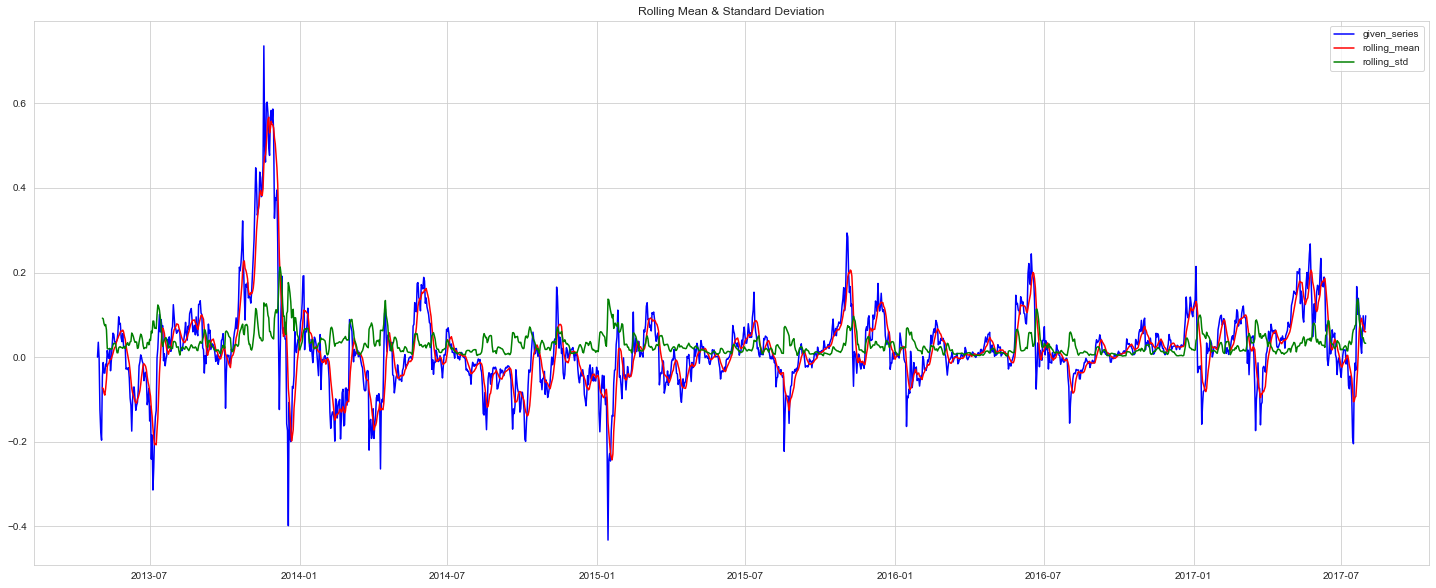

Results of Dickey-Fuller Test:
Test Statistic                   -5.442038
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1532.000000
Critical Value (1%)              -3.434626
Critical Value (5%)              -2.863428
Critical Value (10%)             -2.567775
dtype: float64


In [26]:
log_expmovwt_diff = ts_logtransformed - Expwighted_avg

test_for_stationary(log_expmovwt_diff)

* Now the Current Time Series is Stationary,the TS (test_statistic) value is less than 1% Critcal value. 
* Since Weights are assigned to values from the starting index. Therefore the test works

* Few other Methods to Eliminate Trend and Seasonality. 
* Here, Implementing Differencing and Decompostion.

<AxesSubplot:xlabel='Date'>

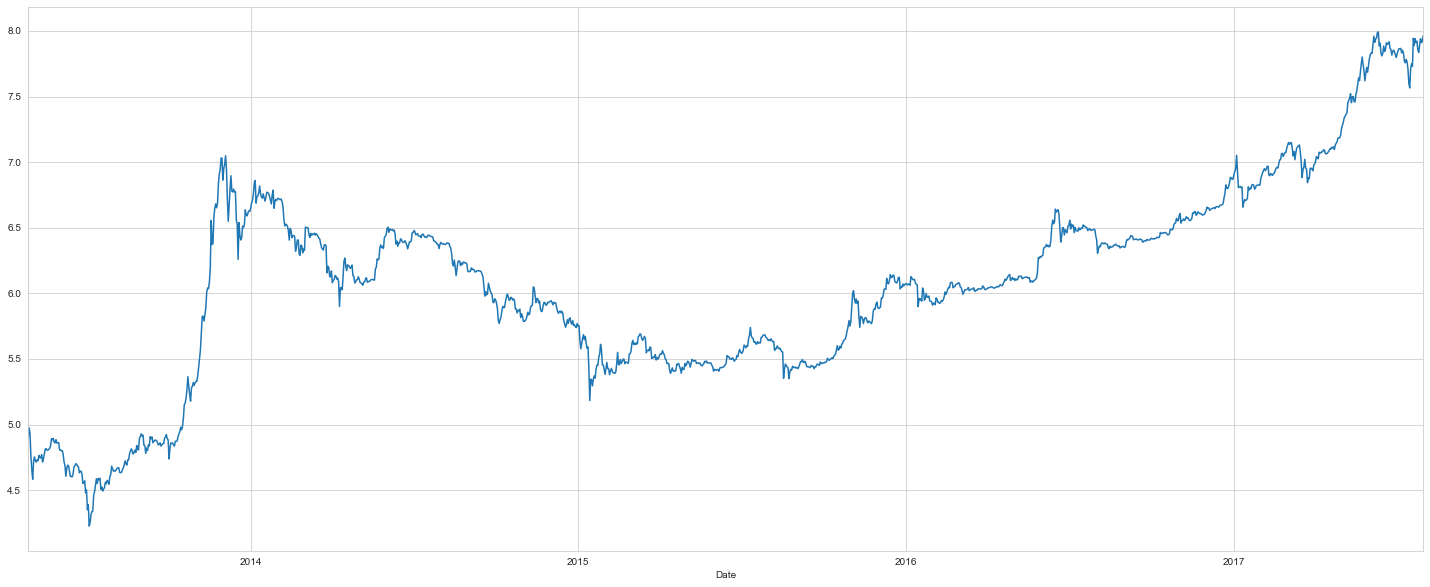

In [27]:
plt.figure(figsize = (25,10))
ts_logtransformed.plot()

## Seasonality Adjustment by Differencing

* Seasonal Components in a Time series can be elimnated by using differencing. 
* If there is a Seasonal Component at level of one month, then it can be removed on an observation today by substracting the value from last month (Ex: Value(Oct 1)-Value(sep 1), value (oct 2 - Value(Sep 2),.....) 
* We can substract last months data to the presents (giving a gap of 30 days) and first months data would not be available for modeling.

* Trying to difference different types of seasonality and test for statioanarized data.

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05   -0.146592
2013-05-06   -0.252382
2013-05-07   -0.220449
Name: Close, dtype: float64

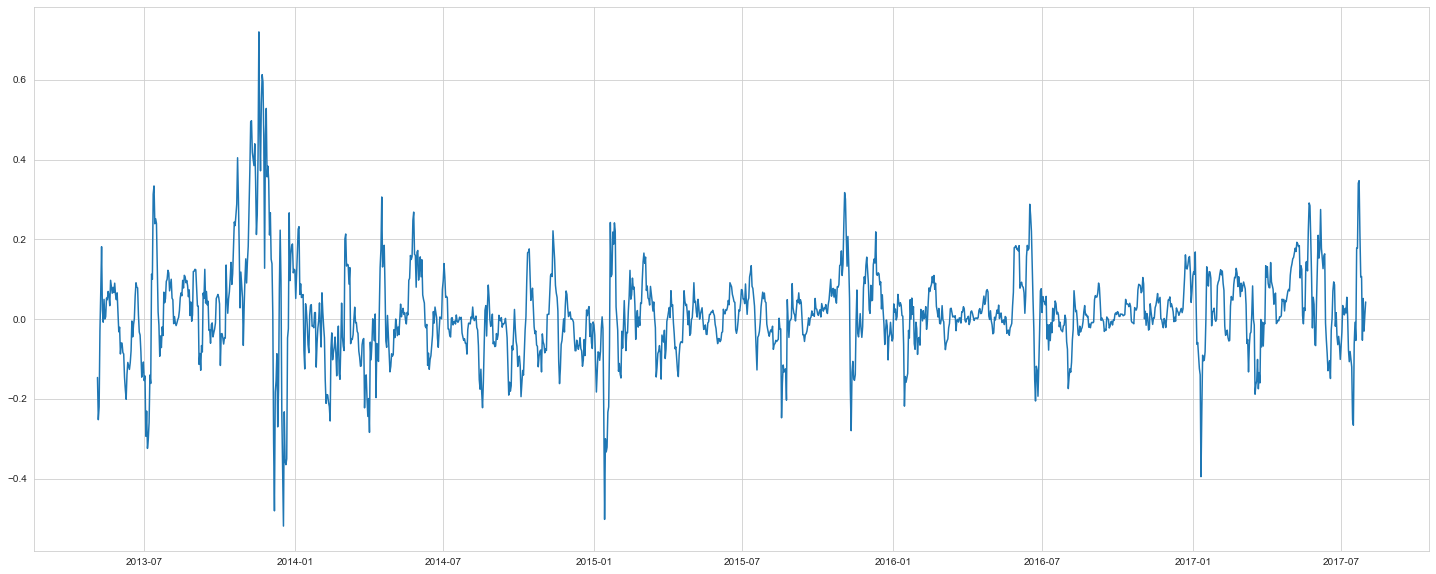

In [28]:
ts_diff_logtrans = ts_logtransformed - ts_logtransformed.shift(7)
plt.figure(figsize = (25,10))
plt.plot(ts_diff_logtrans)
ts_diff_logtrans.head(10)

<Figure size 1800x720 with 0 Axes>

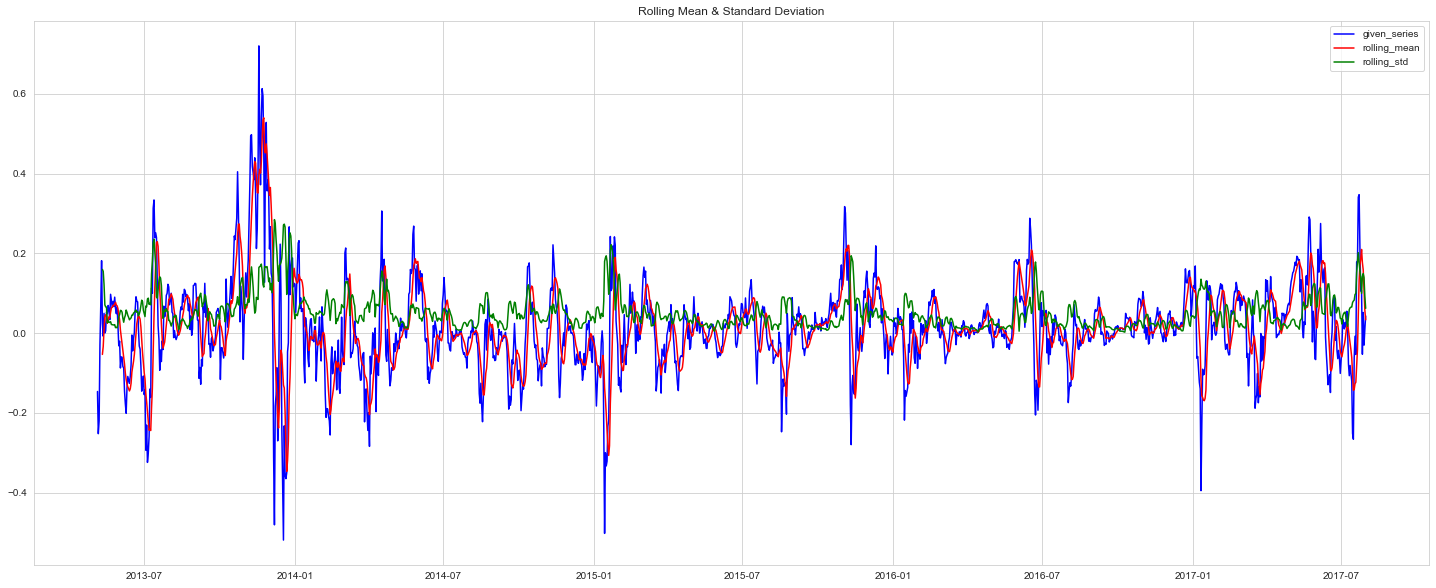

Results of Dickey-Fuller Test:
Test Statistic                -6.523574e+00
p-value                        1.027774e-08
#Lags Used                     2.300000e+01
Number of Observations Used    1.525000e+03
Critical Value (1%)           -3.434645e+00
Critical Value (5%)           -2.863437e+00
Critical Value (10%)          -2.567780e+00
dtype: float64


In [29]:
plt.figure(figsize = (25,10))
ts_diff_logtrans.dropna(inplace = True)
test_for_stationary(ts_diff_logtrans)

* The Dickey-Fuller Test Statis is very much less than 1% criticasl value than in the previous case. 
* We can say that the Time series is Stationary with 99% confidence.

## Decomposing

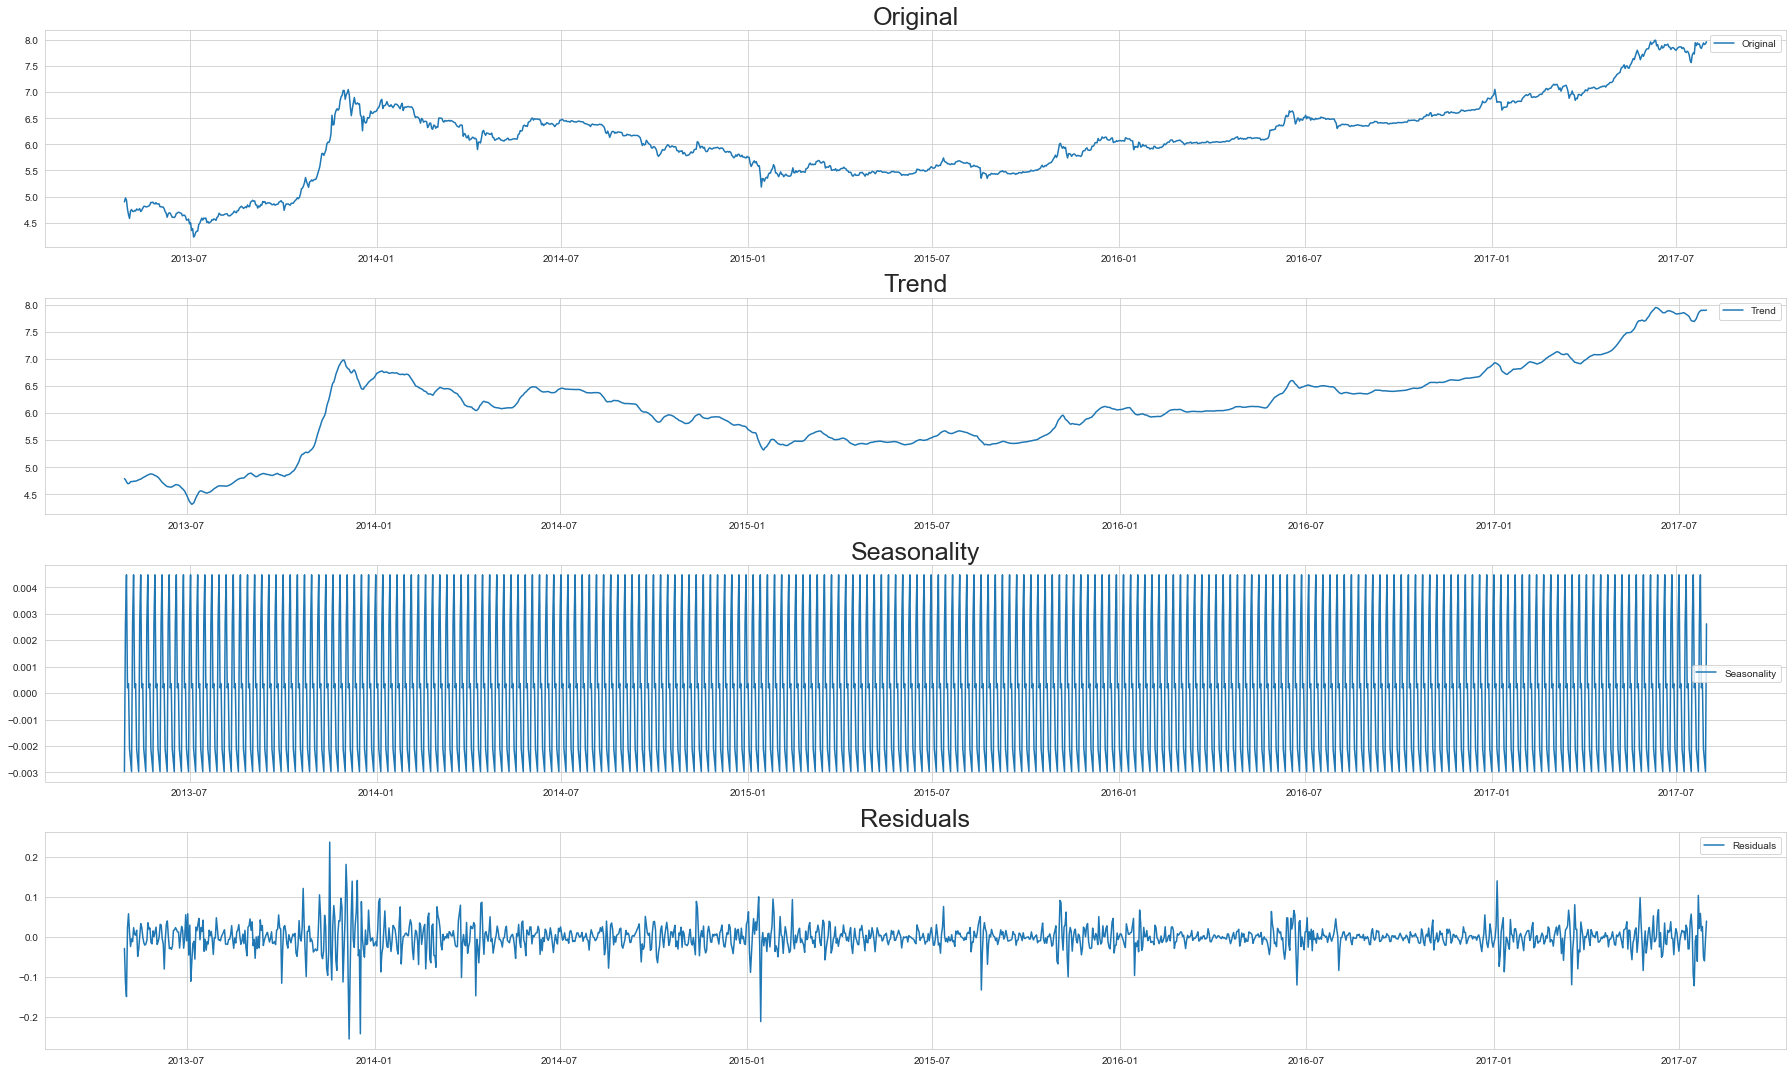

In [30]:
Decomposition = seasonal_decompose(ts_logtransformed)

Trend = Decomposition.trend
Seasonal = Decomposition.seasonal
Residual = Decomposition.resid

plt.figure(figsize = (25,15))
plt.subplot(411)
plt.plot(ts_logtransformed, label = 'Original')
plt.title('Original', fontsize = 25)
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(Trend, label = 'Trend')
plt.title('Trend', fontsize = 25)
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(Seasonal, label = 'Seasonality')
plt.title('Seasonality', fontsize = 25)
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(Residual, label = 'Residuals')
plt.title('Residuals', fontsize = 25)
plt.legend(loc = 'best')
plt.tight_layout()

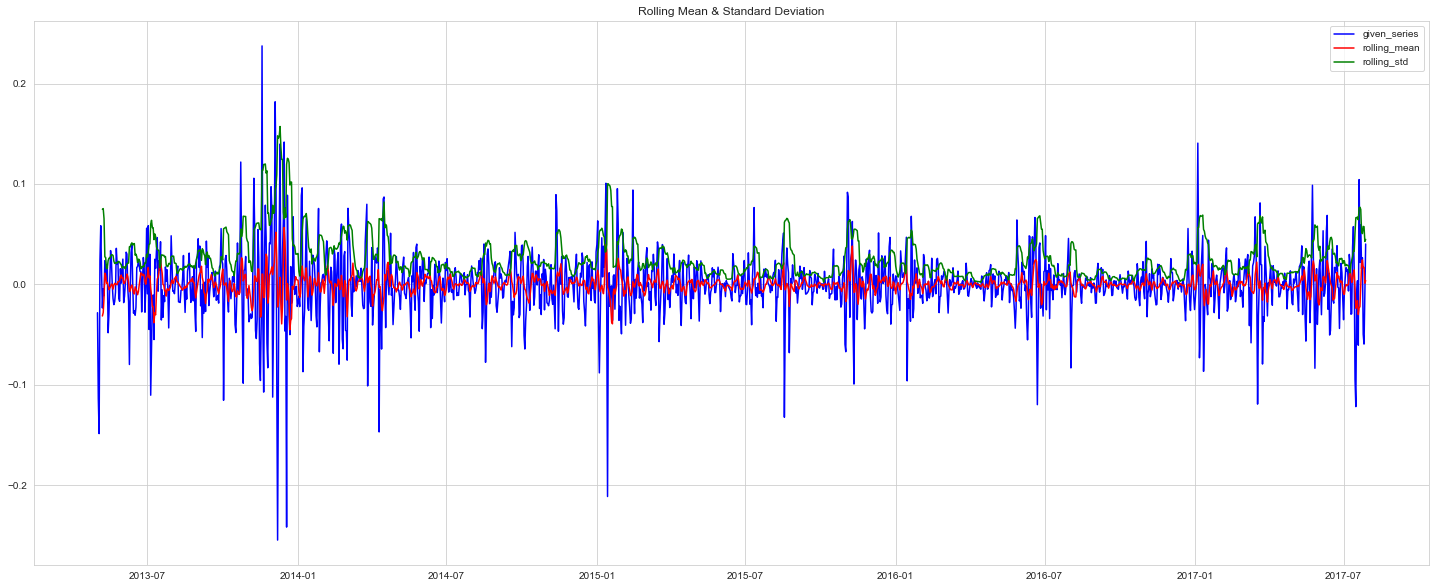

Results of Dickey-Fuller Test:
Test Statistic                -1.256779e+01
p-value                        2.035387e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.526000e+03
Critical Value (1%)           -3.434642e+00
Critical Value (5%)           -2.863436e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [31]:
Decomposed_TS = Residual
Decomposed_TS.dropna(inplace = True)
test_for_stationary(Decomposed_TS)

## Forecasting

In [32]:
lag_acf = acf(ts_diff_logtrans, nlags = 30)
lag_pacf = pacf(ts_diff_logtrans, nlags = 50, method = 'ols')

Text(0.5, 1.0, 'Autocorrelation Function')

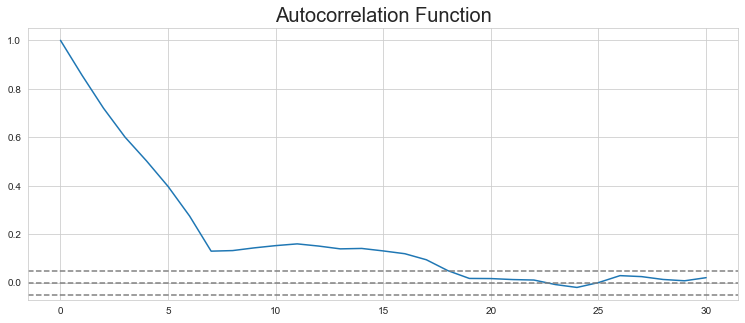

In [33]:
plt.figure(figsize = (28,5))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_diff_logtrans)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_diff_logtrans)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function', fontsize = 20)

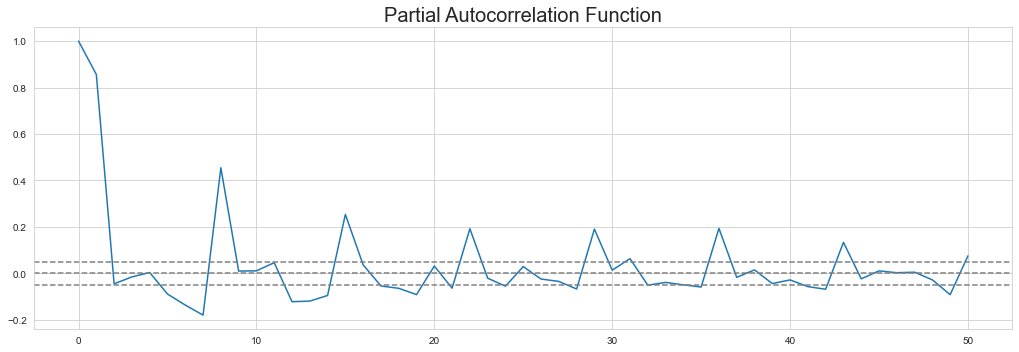

In [34]:
plt.figure(figsize = (28,5))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(ts_diff_logtrans)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(ts_diff_logtrans)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function', fontsize = 20)
plt.tight_layout()

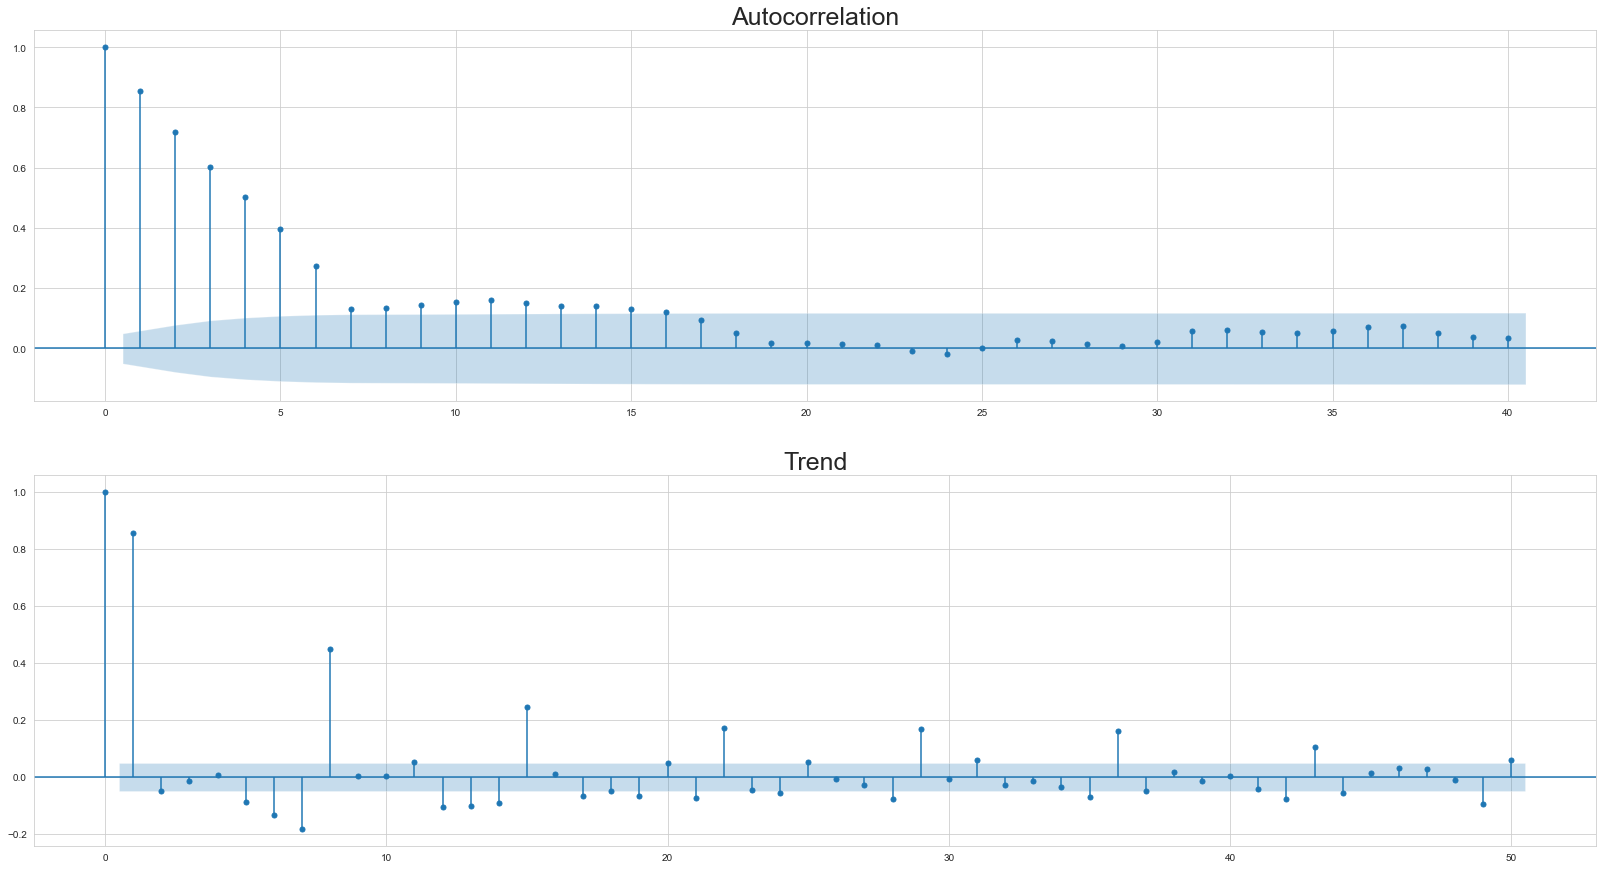

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plt.figure(figsize = (28,15))
pyplot.subplot(211)
plot_acf(ts_diff_logtrans, ax = pyplot.gca(), lags = 40)
plt.title('Autocorrelation', fontsize = 25)

pyplot.subplot(212)
plot_pacf(ts_diff_logtrans, ax = pyplot.gca(), lags = 50)
plt.title('Trend', fontsize = 25)

pyplot.show()

#### Observations from the Plots.

* In this plot, the two dotted lines on either sides of 0 are the confidence interevals. 
* These can be used to determine the ‘p’ and ‘q’ values as: 
* The Lag values are identified from PACF and ACF plots for Autoregression(AR) and Moving Average(MA) parameters, p and q respectively.


* p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
* If you notice closely, in this case p=2, The PACF shows a significant lag on day 2


* q – The lag value where the ACF chart crosses the upper confidence interval for the first time. 
* If you notice closely, in this case q=18, since the ACF shows a significant lag for 18th day.


* The PACF perhaps has some significant lag at 7th, 8th, 12th, 15th day and so on, which also suggests that there is still some seasonality present in the differenced data. 
* We will try different orders of ARIMA models to identify the best order by deriving the residual sum of squares(RSS) for each model. 
* Lower RSS are considered to be the best ones

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
ts_diff_logtrans = ts_diff_logtrans.fillna(0)

## AR Model

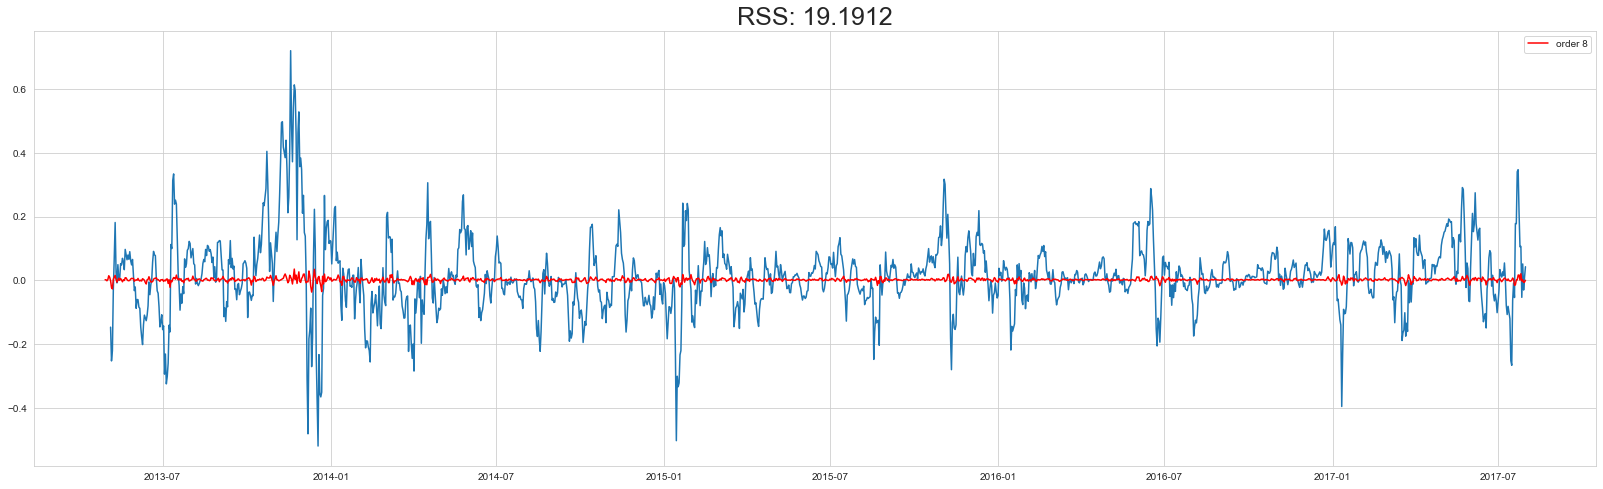

In [38]:
model = ARIMA(ts_logtransformed, order = (8, 1, 0))  
results_AR = model.fit(disp = -1)  
plt.figure(figsize = (28,8))
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color = 'red', label = 'order 8')
RSS = results_AR.fittedvalues-ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title('RSS: %.4f'% sum(RSS**2), fontsize = 25)
plt.legend(loc = 'best')

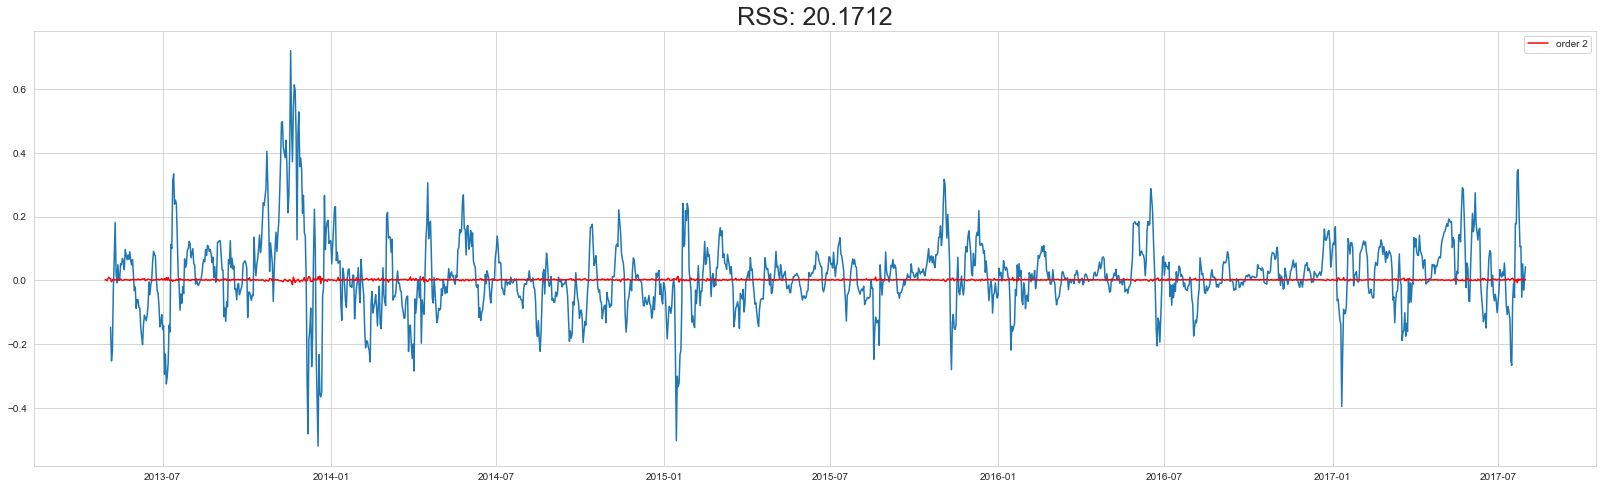

In [39]:
model = ARIMA(ts_logtransformed, order = (2, 1, 0))  
results_AR = model.fit(disp = -1)  
plt.figure(figsize = (28,8))
plt.plot(ts_diff_logtrans)
plt.plot(results_AR.fittedvalues, color = 'red', label = 'order 2')
RSS = results_AR.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title('RSS: %.4f'% sum(RSS**2), fontsize = 25)
plt.legend(loc ='best')

In [40]:
print(results_AR.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2704.690
Method:                       css-mle   S.D. of innovations              0.042
Date:                Tue, 10 Aug 2021   AIC                          -5401.380
Time:                        20:33:39   BIC                          -5379.984
Sample:                    04-29-2013   HQIC                         -5393.424
                         - 07-31-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0020      0.001      1.908      0.056   -5.37e-05       0.004
ar.L1.D.Close    -0.0011      0.025     -0.044      0.965      -0.051       0.049
ar.L2.D.Close    -0.0435      0.025     

## MA Model

Text(0.5, 1.0, 'RSS: 19.0817')

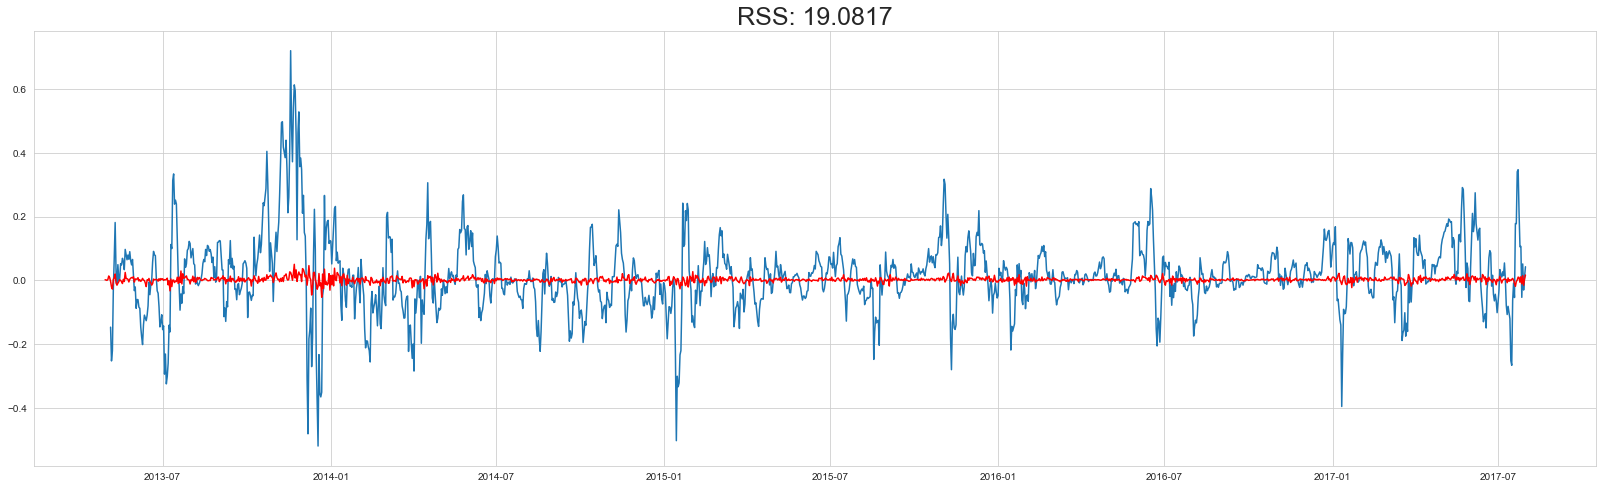

In [41]:
model = ARIMA(ts_logtransformed, order = (0, 1,18)) 
results_MA = model.fit(disp = -1)  
plt.figure(figsize = (28,8))
plt.plot(ts_diff_logtrans)
plt.plot(results_MA.fittedvalues, color = 'red')
RSS = results_MA.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title('RSS: %.4f'% sum(RSS**2), fontsize = 25)

In [42]:
print(results_MA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:                ARIMA(0, 1, 18)   Log Likelihood                2727.323
Method:                       css-mle   S.D. of innovations              0.042
Date:                Tue, 10 Aug 2021   AIC                          -5414.646
Time:                        20:34:01   BIC                          -5307.661
Sample:                    04-29-2013   HQIC                         -5374.862
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.374      0.169      -0.001       0.005
ma.L1.D.Close     -0.0100      0.026     -0.390      0.697      -0.060       0.040
ma.L2.D.Close     -0.0373      0.025

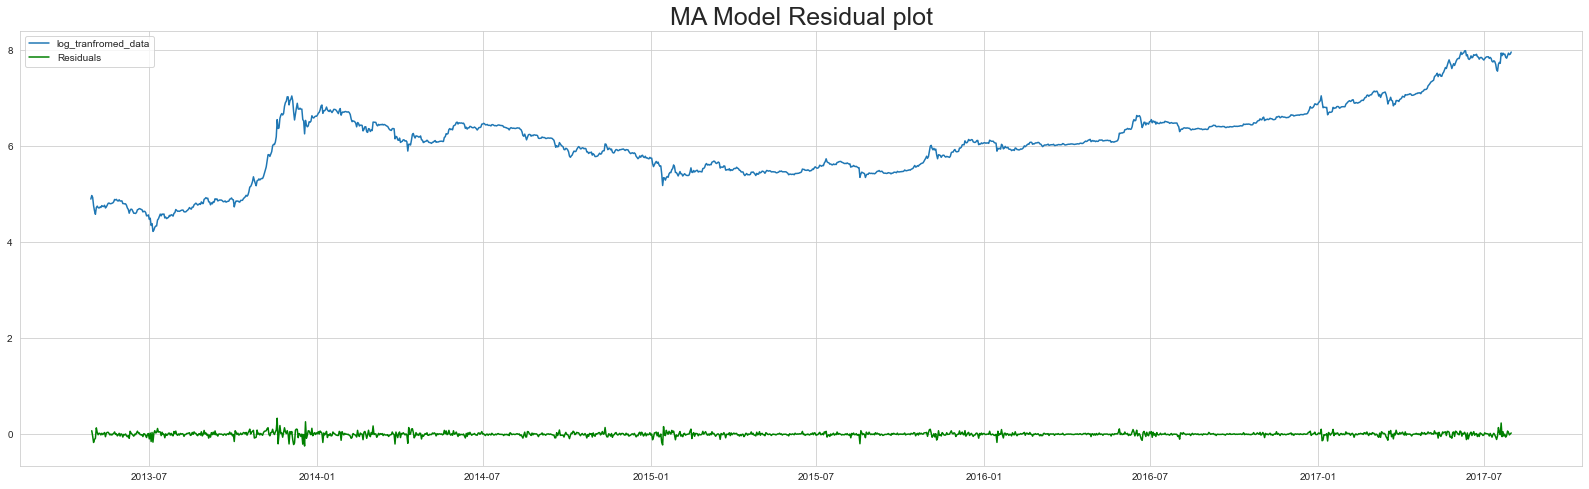

In [43]:
plt.figure(figsize = (28,8))
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_MA.resid, color ='green', label= 'Residuals')
plt.title('MA Model Residual plot', fontsize = 25)
plt.legend(loc = 'best')

count    1555.000000
mean        0.000053
std         0.041911
min        -0.246817
25%        -0.013552
50%         0.000411
75%         0.015719
max         0.332676
dtype: float64


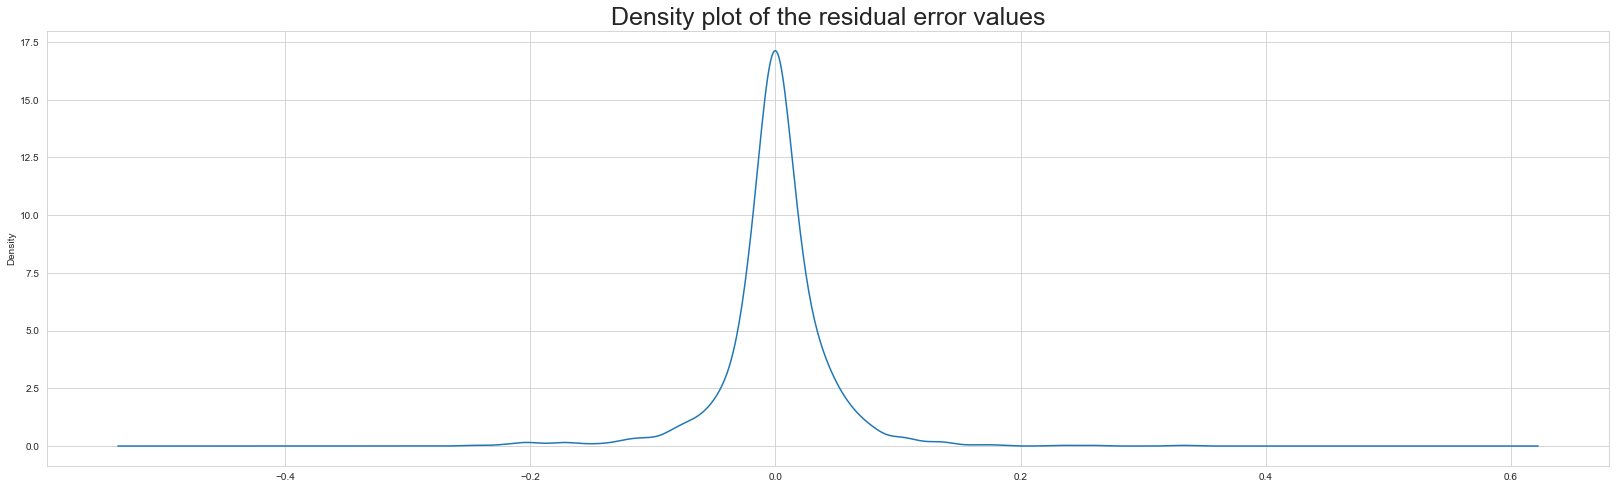

In [44]:
plt.figure(figsize = (28,8))
results_MA.resid.plot(kind = 'kde')
plt.title('Density plot of the residual error values', fontsize = 25)
print(results_MA.resid.describe())

## ARIMA Combined Model

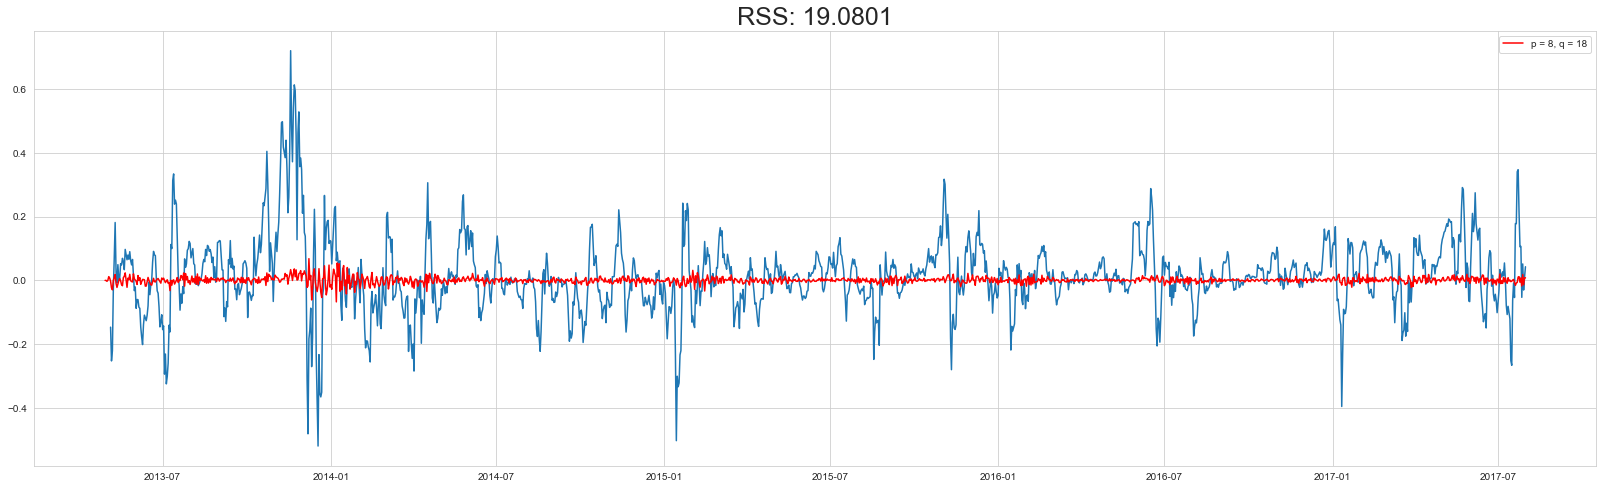

In [45]:
model = ARIMA(ts_logtransformed, order = (8, 1, 18))  
results_ARIMA = model.fit(trend = 'nc', disp = -1) 
plt.figure(figsize = (28,8))
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color = 'red', label = 'p = 8, q = 18')
RSS = results_ARIMA.fittedvalues - ts_diff_logtrans
RSS.dropna(inplace = True)
plt.title('RSS: %.4f'% sum(RSS**2), fontsize = 25)
plt.legend(loc ='best')

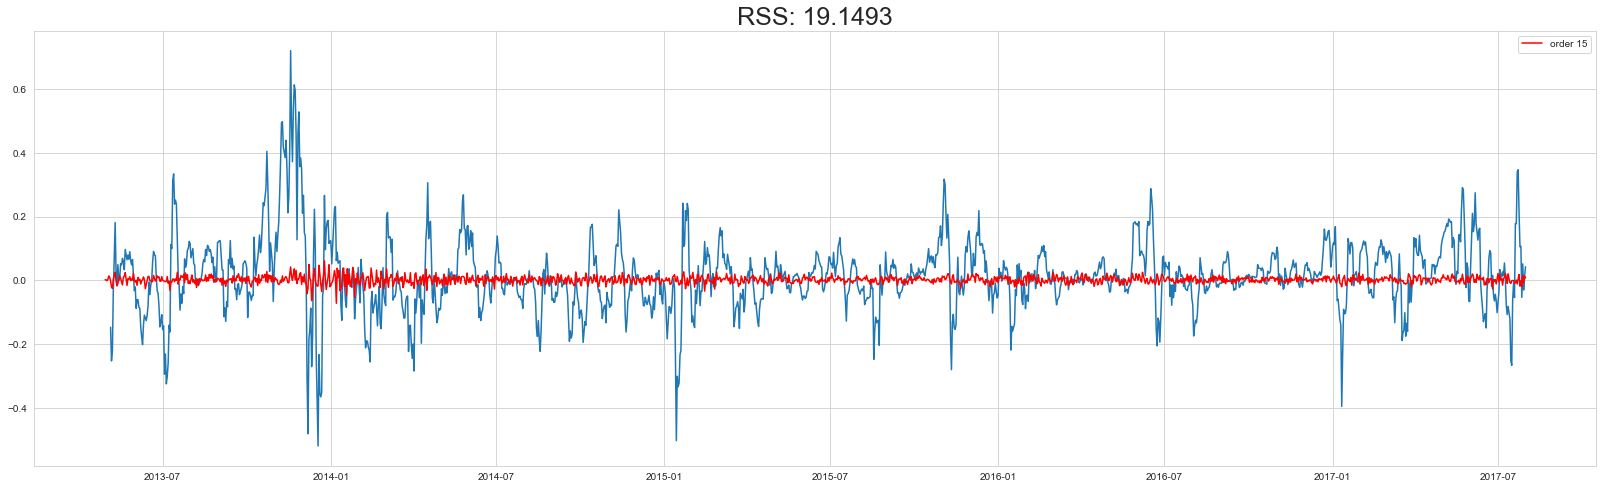

In [46]:
model = ARIMA(ts_logtransformed, order = (20, 1, 18)) 
results_ARIMA = model.fit(disp = -1)
plt.figure(figsize = (28,8))
plt.plot(ts_diff_logtrans)
plt.plot(results_ARIMA.fittedvalues, color = 'red', label = 'order 15') 
RSS = results_ARIMA.fittedvalues - ts_diff_logtrans 
RSS.dropna(inplace = True) 
plt.title('RSS: %.4f'% sum(RSS**2), fontsize = 25) 
plt.legend(loc = 'best')

## Searching ARIMA Parameters

* The above Plots and Models derive varying Residual RSS. Evaluating all these Models might be difficult. 
* SO we do a Grid Search on all possible ARIMA parameters. 
* We look for different p,d,q combinations, and find the best combination. 
* p = 7 ,10,13,16,19  
* d = 0 to 2 taking 10 runs of the model and this will take some time to run


In [47]:
import warnings 
def evaluate_arima_model(data_set, arima_order):
    model = ARIMA(data_set, order = arima_order) 
    results_ARIMA = model.fit(disp = -1) 
    RSS_diff = results_ARIMA.fittedvalues - ts_diff_logtrans
    RSS = RSS_diff**2 
    return RSS 
def evaluate_models(dataset, p_values, d_values):
    best_score, best_cfg = float("inf"), None 
    for p in p_values:
        for d in d_values:
            order = (p,d,18) 
            try:
                rss = evaluate_arima_model(dataset, order) 
                if rss < best_score:
                    best_score, best_cfg = rss, order 
                    print('ARIMA%s RSS = %.3f' % (order,rss)) 
            except: 
                continue 
                print('Best ARIMA%s RSS = %.3f' % (best_cfg, best_score)) 
                p_values = range(8,20,3) 
                d_values = range(0,3) 
                warnings.filterwarnings('ignore') 
                evaluate_models(ts_logtransformed, p_values, d_values)

* We can derive the Summary of the ARIMA model as follows explaining the results

In [48]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1555
Model:               ARIMA(20, 1, 18)   Log Likelihood                2760.928
Method:                       css-mle   S.D. of innovations              0.041
Date:                Tue, 10 Aug 2021   AIC                          -5441.855
Time:                        20:51:26   BIC                          -5227.886
Sample:                    04-29-2013   HQIC                         -5362.287
                         - 07-31-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.001      1.699      0.089      -0.000       0.004
ar.L1.D.Close     -0.4467        nan        nan        nan         nan         nan
ar.L2.D.Close     -0.1229        nan

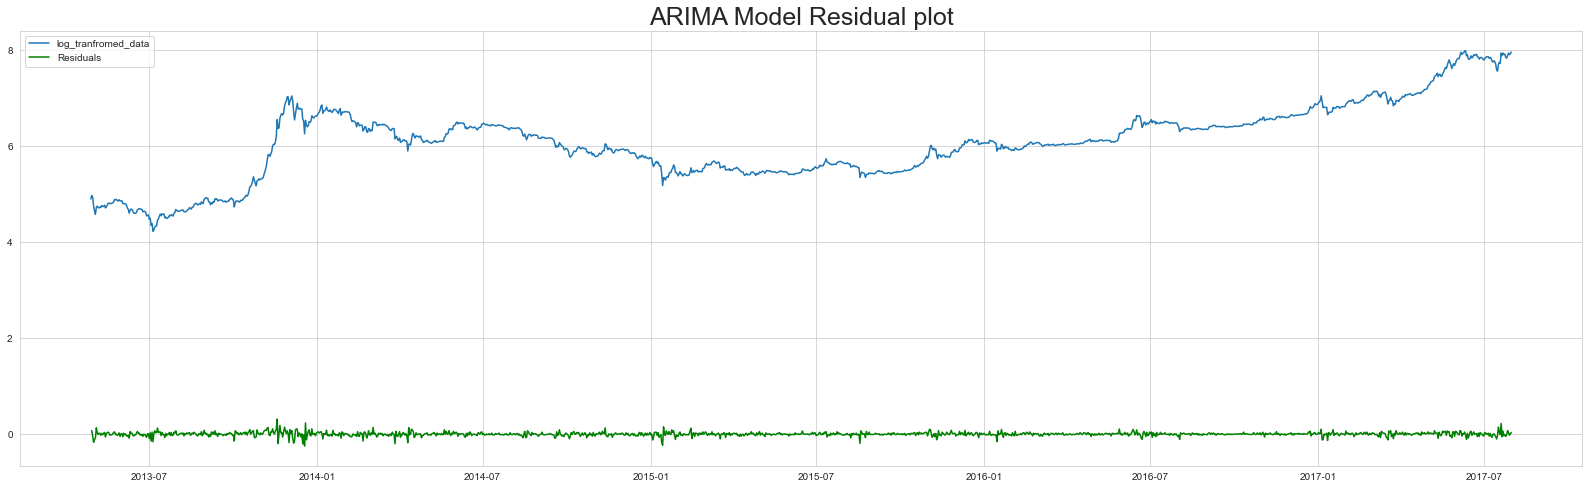

In [49]:
plt.figure(figsize = (28,8))
plt.plot(ts_logtransformed, label = 'log_tranfromed_data')
plt.plot(results_ARIMA.resid, color = 'green', label = 'Residuals')
plt.title('ARIMA Model Residual plot', fontsize = 25)
plt.legend(loc = 'best')

count    1555.000000
mean        0.000059
std         0.041069
min        -0.249158
25%        -0.014723
50%        -0.000411
75%         0.017250
max         0.315323
dtype: float64


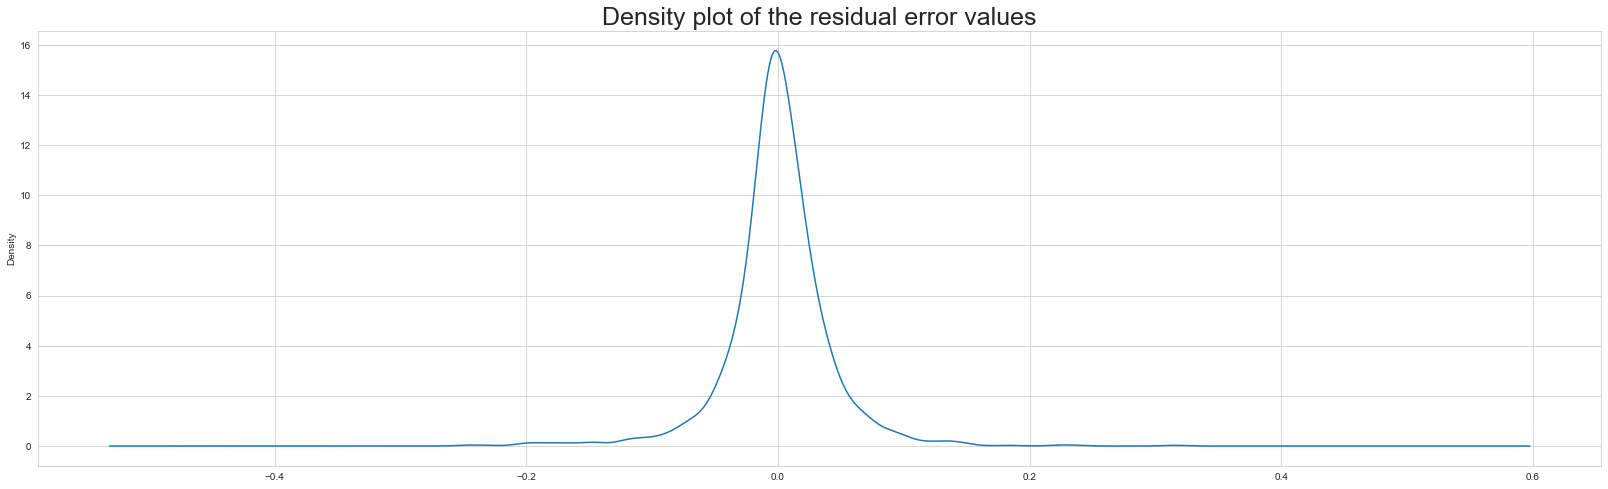

In [50]:
plt.figure(figsize = (28,8))
results_ARIMA.resid.plot(kind = 'kde')
plt.title('Density plot of the residual error values', fontsize = 25)
print(results_ARIMA.resid.describe())

In [51]:
test = pd.read_csv("bitcoin_price_1week_Test - Test.csv", index_col = 'Date')
test.index = pd.to_datetime(test.index)
test = test['Close']
test = test.sort_index()
test

Date
2017-08-01    2718.26
2017-08-02    2710.67
2017-08-03    2804.73
2017-08-04    2895.89
2017-08-05    3252.91
2017-08-06    3213.94
2017-08-07    3378.94
Name: Close, dtype: float64

## Using Combined ARIMA Model to Predict and Forecast

In [52]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Date
2013-04-29    0.001927
2013-04-30    0.001943
2013-05-01   -0.001062
2013-05-02    0.002360
2013-05-03    0.013765
dtype: float64


In [53]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2013-04-29    0.001927
2013-04-30    0.003870
2013-05-01    0.002808
2013-05-02    0.005167
2013-05-03    0.018933
dtype: float64


In [54]:
predictions_ARIMA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.901333
2013-04-30    4.903276
2013-05-01    4.902213
2013-05-02    4.904573
dtype: float64

Text(0.5, 1.0, 'RMSE: 461.7778')

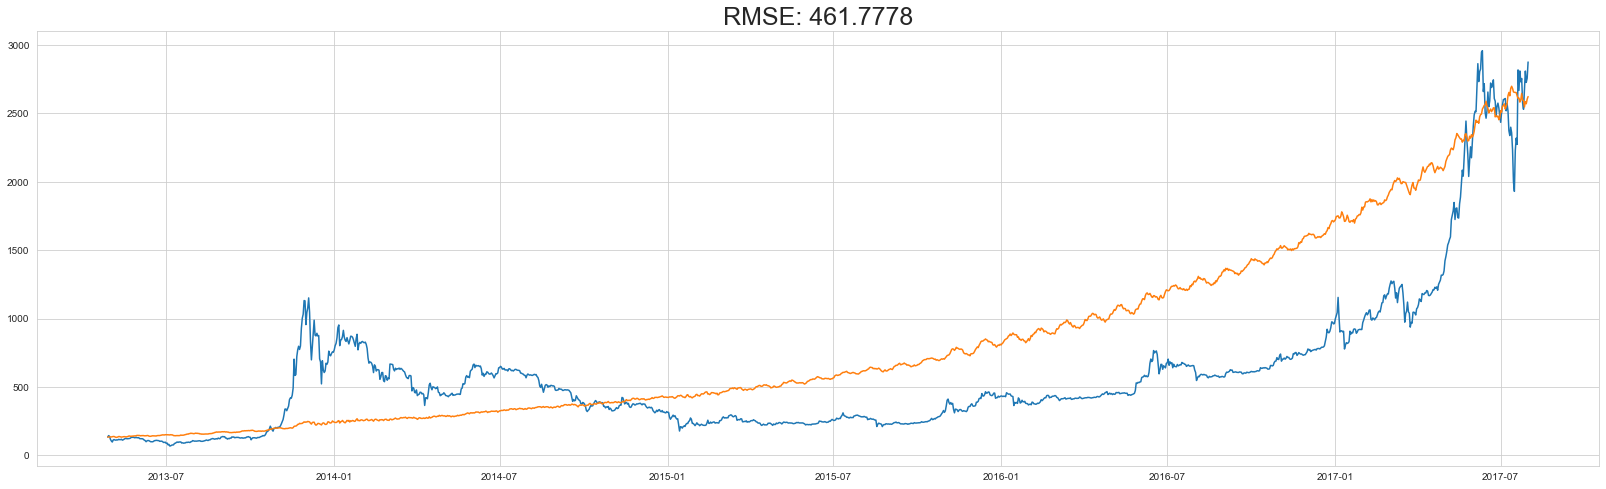

In [55]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize = (28,8))
plt.plot(Data['Close'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - Data['Close'])**2)/len(Data['Close'])), fontsize = 25)

In [56]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), 
         pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_ARIMA.forecast(steps = 7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2892.847097
2017-08-02    2970.767299
2017-08-03    3001.740586
2017-08-04    3051.358362
2017-08-05    2982.134914
2017-08-06    3060.281868
2017-08-07    2854.266421
dtype: float64
Test MSE: 76189.597


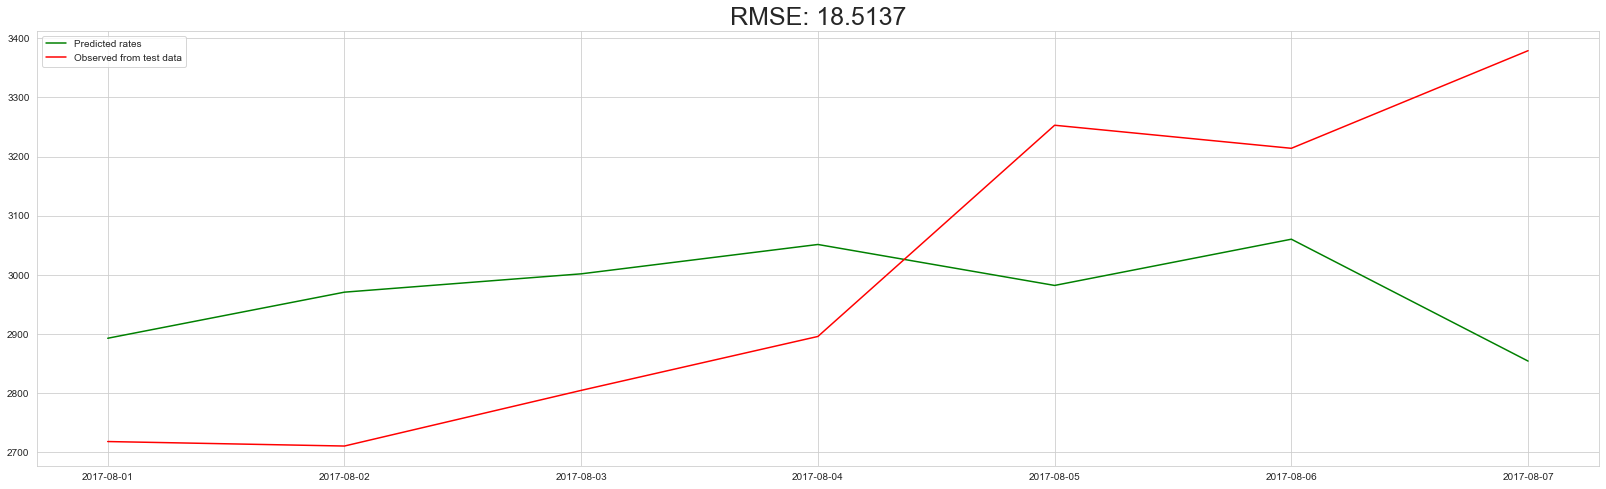

In [57]:
plt.figure(figsize = (28,8))
plt.plot(forecast, color = 'green', label = 'Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast - test)**2)/len(Data)), fontsize = 25)
plt.legend(loc = 'best')

## Using MA Model to Predict and Forecast

* Here we can see that the AR and MA, and the combined ARIMA models have almost the same RSS but MA model is significantly better in computational performance. So we use it to predict the price.

In [58]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy = True)
print(predictions_MA_diff.head())

Date
2013-04-29    0.001941
2013-04-30    0.001458
2013-05-01    0.000081
2013-05-02    0.002704
2013-05-03    0.013811
dtype: float64


In [59]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Date
2013-04-29    0.001941
2013-04-30    0.003399
2013-05-01    0.003479
2013-05-02    0.006184
2013-05-03    0.019995
dtype: float64


* Notice that the predictions arent starting from 2013-04-28. 
* Because we took a lag by 1 and first element doesn’t have anything before it to subtract from. 
* The way to convert the differencing to log scale is to add these differences consecutively to the base number. 
* An easy way to do it is to first determine the cumulative sum at index and then add it to the base number.

In [60]:
predictions_MA_log = pd.Series(ts_logtransformed.iloc[0], index = ts_logtransformed.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum, fill_value = 0)
predictions_MA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.901347
2013-04-30    4.902805
2013-05-01    4.902885
2013-05-02    4.905590
dtype: float64

Text(0.5, 1.0, 'RMSE: 362.5189')

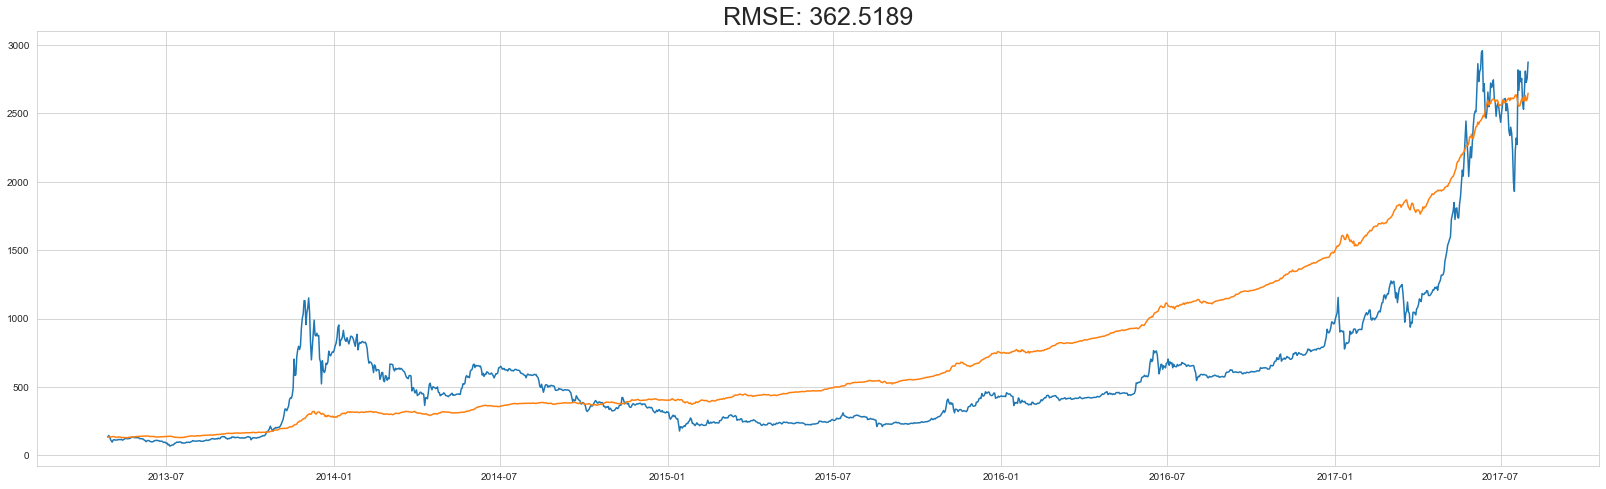

In [61]:
predictions_MA = np.exp(predictions_MA_log)
plt.figure(figsize = (28,8))
plt.plot(Data['Close'])
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA - Data['Close'])**2)/len(Data['Close'])), fontsize = 25)

In [62]:
dates = [pd.Timestamp('2017-08-01'), pd.Timestamp('2017-08-02'), pd.Timestamp('2017-08-03'),pd.Timestamp('2017-08-04'), 
         pd.Timestamp('2017-08-05'), pd.Timestamp('2017-08-06'), pd.Timestamp('2017-08-07')]

forecast = pd.Series(results_MA.forecast(steps = 7)[0],dates)
forecast = np.exp(forecast)
print(forecast)
error = mean_squared_error(test, forecast)
print('Test MSE: %.3f' % error)

2017-08-01    2873.760820
2017-08-02    2933.263249
2017-08-03    2985.844075
2017-08-04    3001.085298
2017-08-05    2982.756171
2017-08-06    3057.337952
2017-08-07    3063.277791
dtype: float64
Test MSE: 44963.792


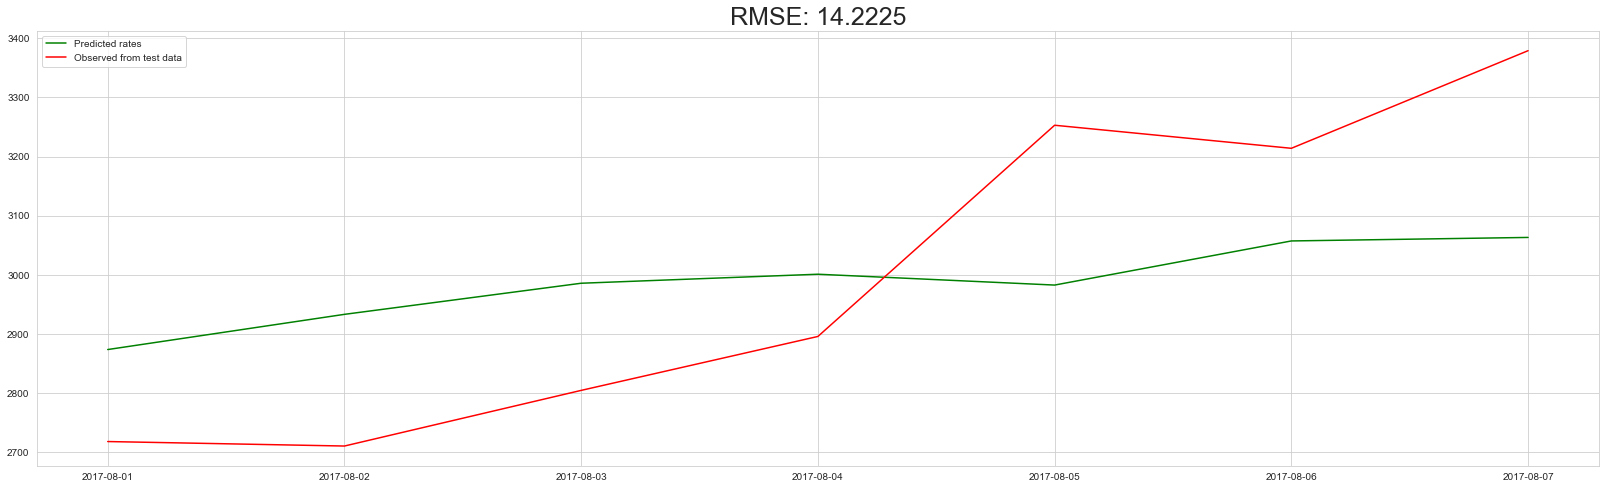

In [63]:
plt.figure(figsize = (28,8))
plt.plot(forecast, color = 'green', label ='Predicted rates')
plt.plot(test, color = 'red', label = 'Observed from test data')
plt.title('RMSE: %.4f'% np.sqrt(sum((forecast - test)**2)/len(Data['Close'])), fontsize = 25)
plt.legend(loc = 'best')

* Much work has to be done on eliminating hte seasonality in the above time series. 
* More methods licke curve fitting and differnce can be extended to identify seasonality and remove the seasonal component from the data.


* An improved model may be to subtract the average coin price from the same calendar month in the previous year, rather than the same day.


* We can start off by resampling the dataset to a monthly average price. 
* The resampling methods handles the concept of leap years while eliminating the offset (for example feb has only 28 days ).

Date
2013-04-30    139.250000
2013-05-31    119.993226
2013-06-30    107.761333
2013-07-31     90.512258
2013-08-31    113.905161
2013-09-30    130.061667
2013-10-31    158.311935
2013-11-30    550.420667
2013-12-31    800.780968
2014-01-31    844.168387
2014-02-28    661.618214
2014-03-31    592.200323
2014-04-30    461.362000
Freq: M, Name: Close, dtype: float64


<AxesSubplot:xlabel='Date'>

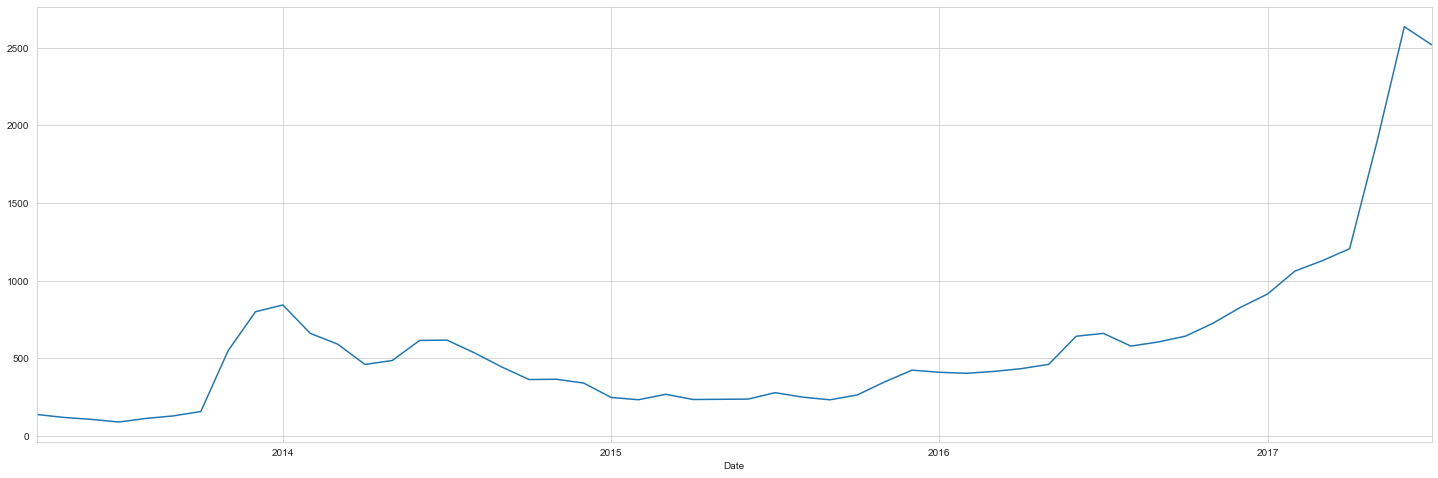

In [64]:
monthly_mean = Data['Close'].resample('M').mean()
monthly_mean
print(monthly_mean.head(13))
plt.figure(figsize = (25,8))
monthly_mean.plot()

## More Alternative to Derive the Forecasting Performance

In [65]:
test_logtransformed = np.log(test)

In [66]:
history = [x for x in ts_logtransformed]
predictions = list()
for t in range(len(test)):
    output = results_MA.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_logtransformed[t]
    history.append(obs)
    print('predicted = %f, expected = %f' % (yhat, obs))
error = mean_squared_error(test_logtransformed, predictions)
print('Test MSE: %.3f' % error)

predicted = 7.963377, expected = 7.907747
predicted = 7.963377, expected = 7.904951
predicted = 7.963377, expected = 7.939063
predicted = 7.963377, expected = 7.971048
predicted = 7.963377, expected = 8.087305
predicted = 7.963377, expected = 8.075253
predicted = 7.963377, expected = 8.125317
Test MSE: 0.009


* Much work has to be done on eliminating hte seasonality in the above time series. 
* More methods licke curve fitting and differnce can be extended to identify seasonality and remove the seasonal component from the data.


* An improved model may be to subtract the average coin price from the same calendar month in the previous year, rather than the same day.


* We can start off by resampling the dataset to a monthly average price. 
* The resampling methods handles the concept of leap years while eliminating the offset (for example feb has only 28 days ).

In [67]:
from fbprophet import Prophet

In [68]:
Data['Close'].head()

Date
2013-04-28    134.21
2013-04-29    144.54
2013-04-30    139.00
2013-05-01    116.99
2013-05-02    105.21
Name: Close, dtype: float64

In [69]:
data_prophet = Data['Close'].copy()
data_prophet = pd.DataFrame(data_prophet)
data_prophet.reset_index(drop = False, inplace = True)
data_prophet.columns = ['ds','y']
data_prophet

ds        y
0    2013-04-28   134.21
1    2013-04-29   144.54
2    2013-04-30   139.00
3    2013-05-01   116.99
4    2013-05-02   105.21
...         ...      ...
1551 2017-07-27  2671.78
1552 2017-07-28  2809.01
1553 2017-07-29  2726.45
1554 2017-07-30  2757.18
1555 2017-07-31  2875.34

[1556 rows x 2 columns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<AxesSubplot:xlabel='Date', ylabel='y'>

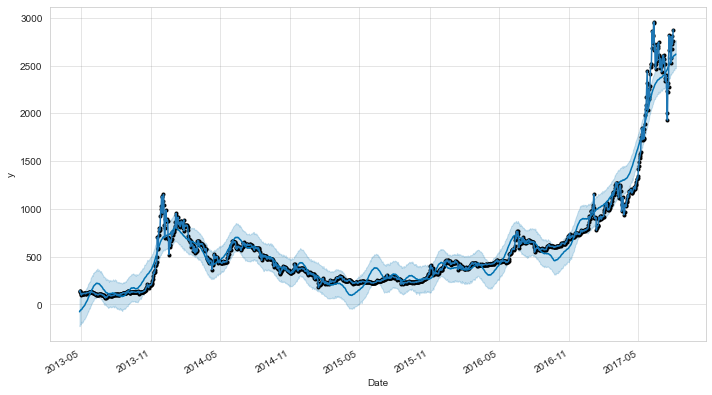

In [70]:
m = Prophet()
m.fit(data_prophet)
future = m.make_future_dataframe(periods = 7, freq = 'D')
forecast = m.predict(future)
m.plot(forecast)
Data['Close'].plot()

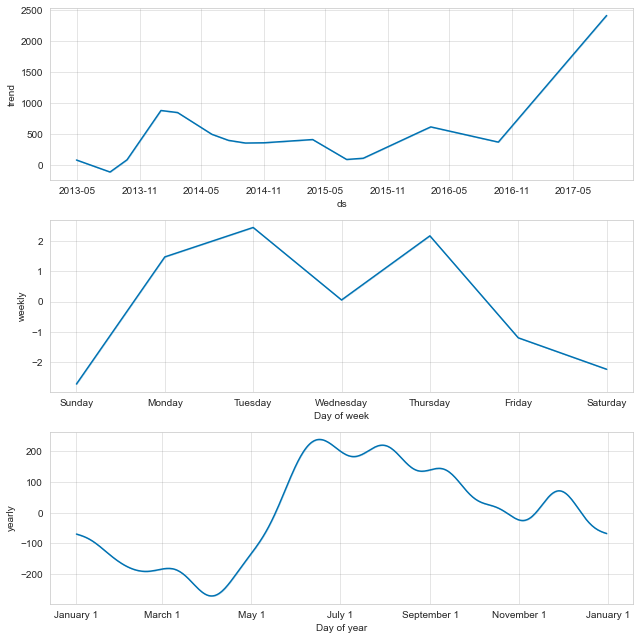

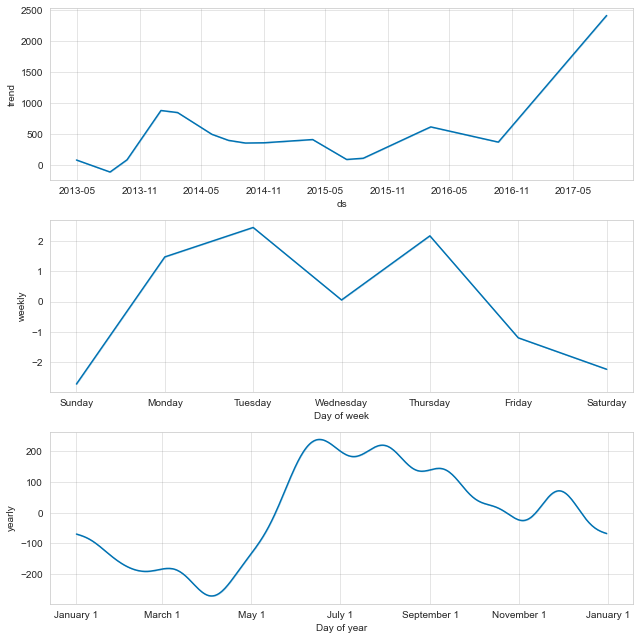

In [71]:
m.plot_components(forecast)

In [72]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [73]:
forecasted_values = forecast[['ds', 'yhat']].tail(10)
forecasted_values

ds         yhat
1553 2017-07-29  2575.791433
1554 2017-07-30  2582.001515
1555 2017-07-31  2592.370954
1556 2017-08-01  2598.950558
1557 2017-08-02  2601.592098
1558 2017-08-03  2608.201670
1559 2017-08-04  2608.768867
1560 2017-08-05  2611.157156
1561 2017-08-06  2613.621105
1562 2017-08-07  2620.352805

In [74]:
forecasted_values = forecasted_values.set_index('ds')
forecasted_values.columns = ['y']
forecasted_values

y
ds                     
2017-07-29  2575.791433
2017-07-30  2582.001515
2017-07-31  2592.370954
2017-08-01  2598.950558
2017-08-02  2601.592098
2017-08-03  2608.201670
2017-08-04  2608.768867
2017-08-05  2611.157156
2017-08-06  2613.621105
2017-08-07  2620.352805

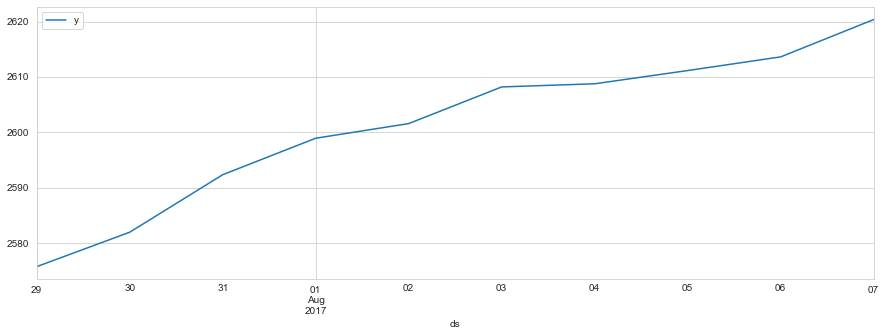

In [75]:
forecasted_values.plot(figsize = (15, 5))
plt.show()

In [76]:
print("The Mean Squared Error of our forecasts is      ",  mean_squared_error(forecasted_values['y'][:7], test))
print("The Root Mean Squared Error of our forecasts is ",  np.sqrt(mean_squared_error(forecasted_values['y'][:7], test)))


The Mean Squared Error of our forecasts is       222059.967905185
The Root Mean Squared Error of our forecasts is  471.23239267391733


## Conclusion:

* This project focuses on the Bitcoin closing price and sentiments of the current market for the development of the predictive model. 
* It does also calculate the market sentiments to predict the price more accurately. 


* The prediction is limited to previous data. 
* The ability to predict data streaming would improve the model's performance and predictability
* The model developed using LSTM is more accurate than the traditional models that demonstrate a deep learning model. 


* In our case, LSTM (Long Short-Term Memory) is obviously an effective learner on training data than ARIMA, with the LSTM more capable of recognizing long-term dependencies. 
* This project uses the daily price fluctuations of the Bitcoin to further investigate the model's predictability with hourly price fluctuations in the future. 

<img src = "05.png" width = 6000 height = 600 />